<b>Problem Statement : </b>Develop a ML Model to predict whether a Card based Transaction is "Fradulant" or not.

<b>Business Value : </b>With the rise, shift and growing demand for use of plastic money, there is significant increase in "Fraud".

We are ... *to complete*

<b>Credits :</b>
1) Brandon Harris for Sparkov_Data_Generation

Importing the required Python libraries

To Do : Think of using requirement.txt to get all the required packages.

In [74]:
#From the guidelines

<h1>JPMC Data Science Bootcamp Capstone Project</h1>
<h2>Objective:</h2>
The objective of this capstone project is to provide students an opportunity to showcase their ability to work on a real-world data science problem from data preprocessing to model deployment. Students are required to select their own dataset, process it, develop a neural network model, and create a user interface (UI) to demo the final product.
________________________________________
Requirements:
1. Dataset Selection:
•	Students must select their own dataset.
•	The dataset should have a minimum of 50,000 records and at least 20 features.
•	The dataset should preferably be related to a business or social problem, ensuring the project has business or social value.
2. Data Preprocessing:
a. Missing Values:
•	Handle missing values using appropriate techniques (e.g., imputation, deletion).
•	Document the percentage of missing values for each column and the technique used to handle them.
b. Outliers:
•	Identify and treat outliers in the dataset.
•	Use visualizations like boxplots to showcase the identification of outliers.
c. Resampling:
•	If the dataset is imbalanced, use resampling techniques such as oversampling, undersampling, or using the Synthetic Minority Over-sampling Technique (SMOTE).
d. Feature Selection and Importance:
•	Use appropriate techniques to select relevant features (e.g., Recursive Feature Elimination).
•	Determine the importance of features using techniques like Permutation Importance or SHAP values.
e. Creating New Columns/Merging Datasets:
•	If relevant, engineer new features that can aid in model performance.
•	Merge additional datasets if it provides added value to the project.
3. Model Development:
•	Use neural networks for modeling.
•	Implement and tune the neural network architecture.
•	Use appropriate evaluation metrics to judge the performance of the model.
•	Document the architecture and hyperparameters used.
4. User Interface (UI) Development:
•	Develop a simple UI where users can input data and get predictions from the trained model.
•	The UI should be intuitive and user-friendly.
•	Bonus: Include visualizations on the UI to display the model's predictions or other relevant insights.
5. Presentation (12 minutes):
a. Business Value:
•	Begin by explaining the business or social value of the chosen problem.
•	Discuss potential impact and benefits of solving the problem.
b. Process of Developing the Model:
•	Walk through the data preprocessing steps.
•	Discuss challenges faced and how they were addressed.
c. Tech Choices:
•	Discuss the technology stack used, including tools, libraries, and frameworks.
•	Explain the rationale behind choosing a neural network for modeling.
d. Model Performance:
•	Present the performance metrics of the neural network.
•	Discuss any overfitting/underfitting issues and how they were addressed.
e. Demonstration:
•	Conclude with a short demonstration of the developed UI.
•	Show how the model works in real-time and how users can benefit from it.
________________________________________
Deliverables:
1.	Codebase: Clean and well-documented code for data preprocessing, modeling, and UI development.
2.	Report: A detailed report explaining all the steps, decisions, and results.
3.	Presentation Slides: A slide deck for the 12-minute presentation.
4.	Demo: A working demonstration of the model through the developed UI.

Evaluation Criteria:
1.	Relevance of Dataset: Importance of the business/social problem tackled.
2.	Data Preprocessing: Thoroughness and appropriateness of preprocessing techniques.
3.	Model Architecture & Performance: Complexity, appropriateness, and performance of the neural network.
4.	UI: Usability and functionality of the user interface.
5.	Presentation: Clarity, structure, and effectiveness of the presentation.
________________________________________
Recommendations:
1.	Dataset Selection: Datasets from platforms like Kaggle, UCI Machine Learning Repository, or government databases can be good starting points.
2.	Technology Stack: Python with libraries like Pandas, Scikit-learn, TensorFlow/Keras for data preprocessing and modeling. For UI, frameworks like Flask or Streamlit can be useful.
3.	Collaboration: While individual efforts are appreciated, students can also consider teaming up to distribute tasks and bring diverse skill sets to the project.
________________________________________
Conclusion:
This capstone project is designed to test the comprehensive skills of a data science aspirant. It covers the entire spectrum, from understanding data to deploying a model. Successful completion of this project will be a testament to the student's readiness to tackle real-world data science challenges.
________________________________________
Note: Ensure to abide by the terms and conditions of the dataset source. Always give credit to the original source when presenting or publishing your work.



<h2>Importing the required packages for our solution</h2>

In [75]:
from category_encoders import WOEEncoder
from datetime import datetime
from icecream import ic
from icecream import install
from matplotlib import pyplot
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
import category_encoders as ce
import gc
import joblib
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import shap
import smote_variants as sv
import time
import warnings
import xgboost as xgb

In [76]:
install()

#to display all the columns in a dataframe
pd.options.display.max_columns = None

#This is to suppress warning messages in teh output cells related to "FutureWarning", like features which could be deprecated
#in future release(s).

warnings.simplefilter(action='ignore', category=FutureWarning)

<h4>We are controlling the over all execution speed by limiting the number of graphs being plotted.</h4>

In [77]:
#For faster processing we will control the plotting based on this flag, when set to False, plots would not be displayed.
display_plots = False
conditional_processesing = True 

<h4>Explicit DataFrame deletion and Garbage Collection</h4>

In [78]:
#The following function deletes the DataFrame if present and explicitly calls GC
def clean_df(df):
    try:
        del (df)
    except NameError:
        pass  # 'df' does not exist, no action needed
    finally:
        gc.collect()

<h2>Reading the input data</h2>

<h3>To-Do A few lines describing about our data </h3>

<h3>Sample data looks as follows</h3>

In [79]:
#ssn|cc_num|first|last|gender|street|city|state|zip|lat|long|city_pop|job|dob|acct_num|profile|trans_num|trans_date|trans_time|unix_time|category|amt|is_fraud|merchant|merch_lat|merch_long
#018-76-7346|2251018143073116|Anthony|Gray|M|7987 Mckay Islands Suite 507|Hampton|FL|32044|29.8575|-82.1483|2060|Equities trader|2004-02-21|318118300879|young_adults_male_rural.json|b82176af551cd0ba8f5234127e0ec3ed|2023-09-05|03:23:49|1693864429|grocery_pos|9.39|1|fraud_Wolf Inc|29.770927|-81.503704
#018-76-7346|2251018143073116|Anthony|Gray|M|7987 Mckay Islands Suite 507|Hampton|FL|32044|29.8575|-82.1483|2060|Equities trader|2004-02-21|318118300879|young_adults_male_rural.json|7895261f4c6046cf84594d5165c11a9b|2023-09-05|01:07:38|1693856258|grocery_pos|297.60|1|fraud_Mosciski, Gislason and Mertz|29.461090|-83.014993
#018-76-7346|2251018143073116|Anthony|Gray|M|7987 Mckay Islands Suite 507|Hampton|FL|32044|29.8575|-82.1483|2060|Equities trader|2004-02-21|318118300879|young_adults_male_rural.json|0ddb4f488f832f3b2faf111f569eb189|2023-09-05|01:27:22|1693857442|gas_transport|297.03|1|fraud_Schmitt Inc|29.948823|-82.509773
#018-76-7346|2251018143073116|Anthony|Gray|M|7987 Mckay Islands Suite 507|Hampton|FL|32044|29.8575|-82.1483|2060|Equities trader|2004-02-21|318118300879|young_adults_male_rural.json|028d1f32baef3131f68a817a652ff60f|2023-09-05|05:57:02|1693873622|grocery_pos|339.51|1|fraud_Kuhic Inc|30.691070|-81.629087


<h3>We will read the input file, since the delimiter is '|' we will pass that to <u><i>sep</i></u> parameter.</h3>
<h3>Since our data is huge we will use the <u><i>engine</i></u> parameter while reading the data</h3>


In [80]:
#Read the input data.
#path = '/home/upskill/Learning/Python/MLData/XLData/cctrandata.csv'
#path = '/home/upskill/Learning/Python/MLData/XLData/ccdata50k.csv'
#path = '/home/upskill/Learning/Python/MLData/XLData/cctrandata3.5GB.csv'
#path = '/home/upskill/Learning/Python/MLData/XLData/ccdata10k.csv'
#path = '/home/upskill/Learning/Python/MLData/XLData/ccdata60k01m.csv'
path = '/home/upskill/Learning/Python/MLData/XLData/ccdata10k01m.csv'
path = '/home/upskill/Learning/Python/MLData/XLData/ccdata05K01M.csv'
##path = '/home/upskill/Learning/Python/MLData/XLData/ccdata15K01M.csv'
#path = '/home/upskill/Learning/Python/MLData/XLData/ccdata5runs.csv'

with open(path, 'r') as file:
    transdata = pd.read_csv(path,sep='|',engine='python')

#transdata = pd.read_csv(path,sep='|',engine='python')

<h3>Since this is synthetic data we are shuffling the data to make it randomized.</h3>

In [81]:
#Since this is synthetic data we are shuffling the data to make it randomized.
df = transdata.sample(frac=1).reset_index(drop=True)
#df['unique_id'] = df['ssn'].str.cat(df['cc_num'].astype(str))

In [82]:
#We will create a new DataFrame to keep working, in case we need to revert we will not re-read the input file.
#clean_df(df)
#df = transdata.copy()

<h3>Printing the basic details on the input data, like <b>shape</b>, <b>describe</b> and <b>info</b>.</h3>

In [83]:
#Print the basic details on the input data.
ic(df.shape)
ic(df.describe())
ic(df.info())

ic| df.shape: (372481, 26)
ic| df.describe():              cc_num            zip            lat           long  \
                   count  3.724810e+05  372481.000000  372481.000000  372481.000000   
                   mean   3.571056e+17   51640.528067      37.400533     -91.884145   
                   std    1.215702e+18   29365.193524       5.175745      15.836168   
                   min    6.040027e+10    1002.000000      19.835300    -159.344800   
                   25%    3.838411e+13   28409.000000      33.748900     -98.391100   
                   50%    3.504390e+15   48382.000000      38.201900     -87.487300   
                   75%    4.518665e+15   78211.000000      41.178800     -80.220500   
                   max    4.999027e+18   99775.000000      64.859100     -68.791800   
                   
                              city_pop      acct_num     unix_time            amt       is_fraud  \
                   count  3.724810e+05  3.724810e+05  3.724810e+05  37

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372481 entries, 0 to 372480
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ssn         372481 non-null  object 
 1   cc_num      372481 non-null  int64  
 2   first       372481 non-null  object 
 3   last        372481 non-null  object 
 4   gender      372481 non-null  object 
 5   street      372481 non-null  object 
 6   city        372481 non-null  object 
 7   state       372481 non-null  object 
 8   zip         372481 non-null  int64  
 9   lat         372481 non-null  float64
 10  long        372481 non-null  float64
 11  city_pop    372481 non-null  int64  
 12  job         372481 non-null  object 
 13  dob         372481 non-null  object 
 14  acct_num    372481 non-null  int64  
 15  profile     372481 non-null  object 
 16  trans_num   372481 non-null  object 
 17  trans_date  372481 non-null  object 
 18  trans_time  372481 non-null  object 
 19  un

<h3>We will skim through the data to check for the following</h3>
<ul>- Data Type</ul>
<ul>- Number of Unique Values</ul>
<ul>- Number of Null Values</ul>

In [84]:
def skim_data(data, graph=False, print_value_counts = False):
    na_count = 0
    for colname in data.columns:
        print("*" * 70)
        print("\nSkimming for {}".format(colname))
        print("\tNumber of Null Values found : {}".format(data[colname].isna().sum()))
        print("\tNumber of Unique values found : {}".format(data[colname].nunique()))
        if print_value_counts:
            print("\tThe different unique values found in the column are as follows:")
            print(data[colname].value_counts())
        na_count = na_count + data[colname].isna().sum()
        print("*" * 70)

    if na_count > 0 :
        print("Null Values found in the following columns")
        for colname in data.columns:
            if (data[colname].isna().sum() > 0 ):
                print(colname)
    else:
        print("No Null Values found")
        
    if graph:
        # Plot missing value counts
        plt.figure(figsize=(16, 10))
        sns.barplot(x=data.columns, y=data.isna().sum())
        plt.ylabel('Missing Value Count')
        plt.title('Missing Values by Column')
        plt.show()

skim_data(df)

**********************************************************************

Skimming for ssn
	Number of Null Values found : 0
	Number of Unique values found : 4983
**********************************************************************
**********************************************************************

Skimming for cc_num
	Number of Null Values found : 0
	Number of Unique values found : 4983
**********************************************************************
**********************************************************************

Skimming for first
	Number of Null Values found : 0
	Number of Unique values found : 609
**********************************************************************
**********************************************************************

Skimming for last
	Number of Null Values found : 0
	Number of Unique values found : 908
**********************************************************************
**********************************************************************



From the above output of skim_data we can conclude that the given dataset has no missing/ null values.

This is mainly due the input data being "Synthetic"

<h2>Exploratory Data Analysis</h2>

In [85]:
#We will start our EDA now on our data
#Based on the exploration we will be creating new temporary dataframes, merge it with the input data if requierd abd deleting them once done.

#In case we need to add modify the structure of the data set either by adding or removing
#the columns based on EDA, we will use Pipeline to achieve the same

In [86]:
#Since we have columns like 'city', 'state' and 'merchant_category', we will explore the trends with respect to "Fraud" 
#   - Overall Fraud Analysis on the Input Data
#   - State wise Analysis
#   - City wise Analysis
#   - Merchant Category wise
#   - Merchant Category based on Tram Amount
#   - State Wise Graphical Analysis on US Map
#   - Age Group
#   - Transaction Time (Transaction Hour)
#   - Day of the week.


In [87]:
#Ploting a grap to show the Percentage of Fraud Transactions.
if display_plots:
    sns.histplot(x='is_fraud',data = df,stat='percent')
    plt.show()

if display_plots:
    sns.countplot(x='is_fraud', data=df)
    plt.title('Count of Fraud vs. Non-Fraud Transactions')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.show()   

#We will explore the data State wise to get further insights.

In [88]:
#We will explore the data State wise to get further insights.
fraud_by_state = df.groupby('state')['is_fraud'].count().reset_index()
fraud_by_state_sorted = df.groupby('state')['is_fraud'].count().reset_index().sort_values(by = 'state', ascending= True)
fraud_by_state_top20 = df.groupby('state')['is_fraud'].count().reset_index().sort_values(by = 'is_fraud', ascending= False).head(20)

if display_plots:
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    sns.barplot(x='state',y='is_fraud',data=fraud_by_state,width=.5,ax=axes[0])
    axes[0].set_xlabel("States")
    axes[0].set_ylabel("Number of Fraud Transactions")
    axes[0].tick_params(axis='x', rotation=45) 
    axes[0].set_title("Statewise Analysis of Fraud Transactions")

    sns.barplot(x='state',y='is_fraud',data=fraud_by_state_top20,ax=axes[1])
    axes[1].set_xlabel("States")
    axes[1].set_ylabel("Number of Fraud Transactions")
    axes[1].set_title("Statewise Analysis of the Most Fraudulent Locations")

    plt.tight_layout()
    plt.show()

clean_df(fraud_by_state)
clean_df(fraud_by_state_sorted)
clean_df(fraud_by_state_top20)

In [89]:
#Since we see the State having some kind of impact on the Fraud, we will use Weigt of Evidence Encoder on this and apply it on each unique city.

We will explore the data City wise to get further insights.

In [90]:
#We will explore the data City wise to get further insights.
fraud_city_state = df[['city','state','is_fraud','lat','long','city_pop']]
fraud_city_state.loc[:, 'city'] = fraud_city_state.apply(lambda row: f"{row['city']}  ({row['state']})", axis=1)
fraud_by_city = fraud_city_state.groupby('city')['is_fraud'].count().reset_index()
fraud_by_city_sorted = fraud_city_state.groupby('city')['is_fraud'].count().reset_index().sort_values(by = 'is_fraud', ascending= True)
fraud_by_city_top20 = fraud_city_state.groupby('city')['is_fraud'].count().reset_index().sort_values(by = 'is_fraud', ascending= False).head(20)
fraud_city_state['median_city_pop'] = fraud_city_state.groupby('state')['city_pop'].transform('median')

if display_plots:
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    sns.barplot(x='city',y='is_fraud',data=fraud_by_city,width=.5,ax=axes[0])
    axes[0].set_xlabel("Cities")
    axes[0].set_ylabel("Number of Fraud Transactions")
    axes[0].tick_params(axis='x', rotation=45) 
    axes[0].set_title("City wise Analysis of Fraud Transactions")

    sns.barplot(x='city',y='is_fraud',data=fraud_by_city_top20,ax=axes[1])
    axes[1].set_xlabel("Cities")
    axes[1].tick_params(axis='x', rotation=45) 
    axes[1].set_ylabel("Number of Fraud Transactions")
    axes[1].set_title("City wise Analysis of the Most Fraudulent Locations")

    plt.tight_layout()
    plt.show()

clean_df(fraud_city_state)
clean_df(fraud_by_city)
clean_df(fraud_by_city_sorted)
clean_df(fraud_by_city_top20)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [91]:
#Since we see the city having some kind of impact on the Fraud, we will use Weigt of Evidence Encoder on this and apply it on each unique city.

We will explore the data Merchant Category wise to get further insights.

In [92]:
#We will explore the data Merchant Category wise to get further insights.
fraud_by_tran_category_df = df[['amt','category','is_fraud']]
fraud_by_tran_category = fraud_by_tran_category_df.groupby('category')['is_fraud'].count().reset_index()
fraud_by_tran_category_sorted = fraud_by_tran_category_df.groupby('category')['is_fraud'].count().reset_index().sort_values(by = 'is_fraud', ascending= False)
fraud_by_tran_category_amt = fraud_by_tran_category_df.groupby('category')['amt'].sum().reset_index().sort_values(by = 'amt', ascending= False)
fraud_by_tran_category_amt['amt'] = fraud_by_tran_category_amt.apply(lambda row: round(row['amt'] / 1000,2), axis=1)

if display_plots:
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    sns.barplot(x='category',y='is_fraud',data=fraud_by_tran_category_sorted,width=.5,ax=axes[0])
    axes[0].set_xlabel("Merchant Category")
    axes[0].set_ylabel("Number of Fraudulent Transactions")
    axes[0].tick_params(axis='x', rotation=45) 
    axes[0].set_title("Merchant Categories with Highest Fraud Transaction Counts")

    sns.barplot(x='category',y='amt',data=fraud_by_tran_category_amt,ax=axes[1])
    axes[1].set_xlabel("Merchant Category")
    axes[1].tick_params(axis='x', rotation=45) 
    axes[1].set_ylabel("Total Fraud Transactions Amount ($000s)")
    axes[1].set_title("Total Fraud Transactions Amount by Merchant Category")

    sns.boxplot(x='category',y='amt',data=fraud_by_tran_category_df[fraud_by_tran_category_df['is_fraud']==1],ax=axes[2])
    axes[2].set_xlabel("Merchant Category")
    axes[2].tick_params(axis='x', rotation=45) 
    axes[2].set_ylabel("Fraud Transactions Amount")
    axes[2].set_title("Total Fraud Transactions Amount by Merchant Category")

    plt.tight_layout()
    plt.show()

clean_df(fraud_by_tran_category_df)
clean_df(fraud_by_tran_category)
clean_df(fraud_by_tran_category_sorted)
clean_df(fraud_by_tran_category_amt)

In [93]:
def display_data_by_category(display_plots):
    if not display_plots:
        return

    categories = df['category'].unique()

    # Create subplots
    fig, axes = plt.subplots(len(categories), 1, figsize=(12, 8 * len(categories)))

    for i, category in enumerate(categories):
        sns.set()
        ax = axes[i]
        
        # Filter the DataFrame for the current category
        category_df = df[df['category'] == category]
        
        # Create the histogram for 'amt' within the current category
        sns.histplot(ax=ax, x='amt', data=category_df, hue='is_fraud', stat='probability',
                    common_norm=False, bins=50, edgecolor='black')
        
        ax.set_title(f'Transaction view for Category : {category}')
        ax.set_xlabel('Transaction Amount')
        ax.set_ylabel('Percentage of Transactions')
        
        # Set the x-axis range
        ax.set_xlim(0, 1500)

    plt.tight_layout()
    plt.show()

display_data_by_category(display_plots)

In [94]:
#Since we see the category having some kind of impact on the Fraud, we will use Weight of Evidence Encoder on this and apply it.
#We will do the same for Category, State and City.

In [95]:
#Now we will use Weight of Evidence to encode the following and save it in pickle file which we would use during our prediction.


We will explore the data City wise even further to plot it on the map of USA.

In [96]:
#We will explore the data City wise even further to plot it on the map of USA.
zip_city_state_df = df[['zip','city','state','lat','long']]
zip_city_state = zip_city_state_df.drop_duplicates(subset='city')
total_trans_by_city = df.groupby('city').trans_num.count()
fraud_trans_by_city = df.groupby('city').is_fraud.sum()
trans_by_city = pd.merge(fraud_trans_by_city,total_trans_by_city,how='inner',on='city')
trans_by_city = pd.merge(trans_by_city,zip_city_state,how='inner',on='city')
trans_by_city = trans_by_city.rename(columns={'is_fraud': 'fraud_trans', 'trans_num': 'total_trans'})
#trans_by_city['fraud_ratio'] = trans_by_city.apply(lambda row: round((row['fraud_trans'] / row['total_trans'])*100,4), axis=1)
trans_by_city['fraud_ratio'] = trans_by_city.apply(lambda row: round((row['fraud_trans'] / row['total_trans'] * 100), 4) if row['total_trans'] != 0 else 0, axis=1)
trans_by_city_sorted = trans_by_city.sort_values(by = 'fraud_ratio', ascending= False)
trans_by_city_sorted.loc[:, 'city'] = trans_by_city_sorted.apply(lambda row: f"{row['city']}  ({row['state']})", axis=1)
trans_by_city_sorted.reset_index(drop=True, inplace=True)
trans_by_city_sorted['fraud_group'] = pd.qcut(trans_by_city_sorted.index,4,labels=["Most Fraud","Moderate Fraud","Low Fraud","No Fraud"])

if display_plots:
    fig, axes = plt.subplots(1, 1, figsize=(12, 12))
    sns.histplot(x=trans_by_city['fraud_ratio'],bins=100,ax=axes)
    axes.set_xlabel("Fraud Ratio")
    axes.set_ylabel("Number of Cities")
    axes.tick_params(axis='x', rotation=45) 
    axes.set_title("Fraud Ratio Transactions")

    plt.tight_layout()
    plt.show()
#From the above we can see that most of the cities have Fraud Transactions around 10% and there are few with 100% Fraud Transactions

From the above we can see that most of the cities have Fraud Transactions around 10% and there are few with 100% Fraud Transactions

Plotting the data on the Map of USA, we have an option to toggle the view.
We can view the data in the following 4 Categories
- Most Fraud (Red)
- Moderate Fraud (Orange)
- Low Fraud (Lime)
- No Fraud (Light Blue)

In [97]:
def plot_fraud_on_map(display_plots):
    if not display_plots:
        return
    #We will try to plot this on the US Map
    
    colors = ["red","orange","lime","lightblue"]
    labels=["Most Fraud","Moderate Fraud","Low Fraud","No Fraud"]
    fig = go.Figure()

    for index in range(len(labels)):
        maps_df = trans_by_city_sorted[trans_by_city_sorted['fraud_group'] == labels[index]]
        fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = maps_df['long'],
            lat = maps_df['lat'],
            text = maps_df['city'],
            marker = dict(
                size = (maps_df['fraud_ratio'] + 1 ) * 10,
                color = colors[index],
                line_color='rgb(40,40,40)',
                line_width=0.5,
                sizemode = 'area'
            ),
            name = 'Fraud Category - {0}'.format(labels[index])))

    fig.update_layout(
            title='Fraud Transactions of US Data',
            geo=dict(
            scope='usa', 
            showland=True,
            landcolor = 'rgb(217, 217, 217)',
            ),
            width=800,
            height=800
        )

    fig.show()

plot_fraud_on_map(display_plots)

clean_df(zip_city_state_df)
clean_df(zip_city_state)
clean_df(total_trans_by_city)
clean_df(fraud_trans_by_city)
clean_df(trans_by_city)
clean_df(trans_by_city_sorted)

We will explore the data based on Fraud Amount, Customer Age and Transaction Time.

In [98]:
#We will explore the data based on Fraud Amount, Customer Age and Transaction Time.
df['trans_date_time'] = pd.to_datetime(df['trans_date'] + ' ' + df['trans_time']) 
current_year = pd.Timestamp.now().year
categorize_time = lambda hour: 'Night' if 0 <= hour < 6 else 'Morning' if 6 <= hour < 12 else 'Afternoon' if 12 <= hour < 18 else 'Evening' if 18 <= hour < 22 else 'Night'
fraud_by_date_time_df = df[['cc_num','amt','dob','trans_date_time','trans_date','trans_time','is_fraud']].copy()
fraud_by_date_time_df[['dob','trans_date']] = fraud_by_date_time_df[['dob','trans_date']].apply(pd.to_datetime)
fraud_by_date_time_df['trans_time'] = pd.to_datetime(fraud_by_date_time_df['trans_time']).dt.time
fraud_by_date_time_df['age'] = current_year - fraud_by_date_time_df['dob'].dt.year
fraud_by_date_time_df.loc[:,'trans_hr'] = fraud_by_date_time_df['trans_time'].apply(lambda x: x.hour)
fraud_by_date_time_df['day'] = pd.to_datetime(fraud_by_date_time_df['trans_date']).dt.day
fraud_by_date_time_df['weekday'] = pd.to_datetime(fraud_by_date_time_df['trans_date']).dt.strftime('%A')
fraud_by_date_time_df['weekday_num'] = pd.to_datetime(fraud_by_date_time_df['trans_date']).dt.weekday
fraud_by_date_time_df['time_period'] = fraud_by_date_time_df['trans_hr'].apply(categorize_time)
fraud_by_date_time_df_sorted = fraud_by_date_time_df.sort_values(by = 'weekday_num', ascending= False)
age_bins = np.arange(10,120,10)
age_labels = np.arange(10,110,10)
fraud_by_date_time_df['age_group'] = pd.cut(fraud_by_date_time_df['age'], bins=age_bins, labels=age_labels, right=False)

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [99]:
if display_plots:
    sns.set()
    sns.boxplot(x='is_fraud', y='amt', data=df)
    plt.title('Transaction Amount by Fraud vs. Non-Fraud')
    plt.xlabel('Transaction Type')
    plt.ylabel('Transaction Amount')

    sns.set()
    fig, ax = plt.subplots(1,1, figsize = (12,8), constrained_layout=False)
    sns.histplot(ax = ax, x='age', data = fraud_by_date_time_df[fraud_by_date_time_df['is_fraud'] == 1])
    ax.set_title('Fraud Transaction trend with respect to Age')
    ax.set_xlabel('Age of the customers')
    ax.set_ylabel('Number of Fraud Transactions')

    sns.set()
    fig, ax = plt.subplots(1,1, figsize = (12,8), constrained_layout=False)
    sns.histplot(ax = ax, x='age_group', data = fraud_by_date_time_df[fraud_by_date_time_df['is_fraud'] == 1])
    ax.set_title('Fraud Transaction trend with respect to Age')
    ax.set_xlabel('Age Group of the customers')
    ax.set_ylabel('Number of Fraud Transactions')

    sns.set()
    fig, ax = plt.subplots(1,1, figsize = (12,8), constrained_layout=False)
    sns.histplot(ax = ax, x='trans_hr', data = fraud_by_date_time_df[fraud_by_date_time_df['is_fraud'] == 1])
    ax.set_title('Distribution of Fraud Transactions Over Time')
    ax.set_xlabel('Transaction Hour of the Day (HH)')
    ax.set_ylabel('Number of Fraud Transactions')
    ax.xaxis.set_major_locator(MultipleLocator(1)) 
    ax.xaxis.set_major_formatter(FormatStrFormatter('%02d')) 
    ax.set_xlim(0, 23)


    # Create a mapping of weekdays to their respective integer values, starting from Monday (0 for Monday, 1 for Tuesday, etc.)
    weekday_mapping = {
        'Monday': 0,
        'Tuesday': 1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6
    }
    fraud_by_date_time_df['weekday_a'] = fraud_by_date_time_df['weekday'].map(weekday_mapping)
    fraud_by_date_time_df = fraud_by_date_time_df.sort_values(by='weekday_a')

    sns.set()
    fig, ax = plt.subplots(1,1, figsize = (12,8), constrained_layout=False)
    sns.histplot(ax = ax, x='weekday_num', data = fraud_by_date_time_df_sorted[fraud_by_date_time_df_sorted['is_fraud'] == 1])
    ax.set_xticks(range(len(weekday_mapping)))
    ax.set_xticklabels(weekday_mapping.keys())
    ax.set_title('Distribution of Fraud Transactions Over Weekdays')
    ax.set_xlabel('Weekday')
    ax.set_ylabel('Number of Fraud Transactions')
    ax.xaxis.set_major_locator(MultipleLocator(1)) 

    # Create a mapping of timeperiod to their respective integer values, starting from Morning (0 for Morning, 1 for Afternoon, etc.)
    timeperiod_mapping = {
        'Morning': 0,
        'Afternoon': 1,
        'Evening': 2,
        'Night': 3,
    }

    fraud_by_date_time_df['time_period_n'] = fraud_by_date_time_df['time_period'].map(timeperiod_mapping)
    fraud_by_date_time_df = fraud_by_date_time_df.sort_values(by='time_period_n')

    sns.set()
    fig, ax = plt.subplots(1,1, figsize = (12,12), constrained_layout=False)

    ax.set_xticks(range(len(timeperiod_mapping)))
    ax.set_xticklabels(timeperiod_mapping.keys())

    sns.histplot(ax = ax, x='time_period', data = fraud_by_date_time_df[fraud_by_date_time_df['is_fraud'] == 1])
    ax.set_title('Distribution of Fraud Transactions Over Weekdays')
    ax.xaxis.set_major_locator(MultipleLocator(1)) 
    ax.set_title('Fraud Transaction trend with respect to Time Period of the Day')
    ax.set_xlabel('Time Period')
    ax.set_ylabel('Number of Fraud Transactions')

    sns.set()
    fig, ax = plt.subplots(1,1, figsize = (12,12), constrained_layout=False)
    ax.set_xticks(range(len(timeperiod_mapping)))
    ax.set_xticklabels(timeperiod_mapping.keys())

    sns.histplot(ax = ax, x='time_period', data = fraud_by_date_time_df[fraud_by_date_time_df['is_fraud'] == 1])
    ax.xaxis.set_major_locator(MultipleLocator(1)) 
    ax.set_title('Fraud Transaction trend with respect to Time Period of the Day')
    ax.set_xlabel('Time Period')
    ax.set_ylabel('Number of Fraud Transactions')

    sns.set()
    fig, ax = plt.subplots(1,1, figsize = (12,12), constrained_layout=False)
    sns.histplot(ax = ax, x='time_period', data = fraud_by_date_time_df[fraud_by_date_time_df['is_fraud'] == 0])
    ax.xaxis.set_major_locator(MultipleLocator(1)) 
    ax.set_title('Non-Fraud Transaction trend with respect to Time Period of the Day')
    ax.set_xlabel('Time Period')
    ax.set_ylabel('Number of Non-Fraud Transactions')
    plt.show()

clean_df(fraud_by_date_time_df)
clean_df(fraud_by_date_time_df_sorted)

We will calulate the distance between the customer and merchant using Haversine Formula, to explore relation between,
Transaction Amount, Distance and Fraud.

In [100]:
#Looking at the few records we see that we have the Location of the Customer and the Merchant.
#We will use this info get the approx. distance the customer travelled to make the purchase.
#Generally customers mostly preform transactions with close vincinity and in case the customer is 
#performing a transaction at a far off distance, it would be worth probing it further for Risk Screening.

#Since we have positions expressed in Latitude and Longitude we will use Haversine
#  Haversine formula:
# a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
# c = 2 ⋅ atan2( √a, √(1−a) )
# d = R ⋅ c
# where	φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km);
# note that angles need to be in radians to pass to trig functions!

def haversine_distance_vectorized(df):
    lat1, lon1, lat2, lon2 = np.radians(df['lat']), np.radians(df['long']), np.radians(df['merch_lat']), np.radians(df['merch_long'])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    R = 6371.0 # radius of the Earth
    distance = R * c * 0.1
    return round(distance, 2)  

#We will use the above haversine_distance_vectorized to create a new column in the dataframe
df['distance'] = haversine_distance_vectorized(df)

Here we are adding few more additional transaction related parameters like

- Average and Medain Transaction Amount

- Average and Median Distance between the customer and merchant

- Daily Limit Used and Remaining Limit

- Card Usage Per Hour and Per Day

In [101]:
#We will add new indicators whether the 
# - Transaction Amount was above the Average & Median Transaction Amount 
# - Distance was greater than Average & Median Distance
# - Daily Limit Used ($)
# - Remaining Daily Limit ($)
# - Number of Purchases in an Hour 
# - Total Number of Purchases in a Day
# - Median Transaction Amount Merchant Category wise

#Here we are making use of Card Number (cc_num) column to uniquely identify the customer.

#We calculate the accumulated usage based on Card Number and Transaction Date.
#For the Remaining Limit we subtract the Daily Limt from the Accumulate Usage with Miminum value as 0. 
df['daily_limit'] = 5000
df.sort_values(by='trans_date_time', inplace=False)
df['accumulated_daily_usage'] = df.groupby(['cc_num','trans_date'])['amt'].cumsum()
df['remaining_daily_limit'] = (df['daily_limit'] - df['accumulated_daily_usage']).clip(lower=0)
df['category_median_amt'] = df.groupby(['cc_num', 'category'])['amt'].transform('median')

purchase_df = df.groupby('cc_num').agg(
    median_trans_amt=('amt','median'),
    purchase_power_amt=('amt', lambda x: x.quantile(0.75)),
    med_daily=('accumulated_daily_usage','median'),
    med_dist=('distance', 'median'),
    q75_dist=('distance', lambda x: x.quantile(0.75))
)
df = df.merge(purchase_df, on = 'cc_num').reset_index(drop=True)
df['over_median_amt'] = (df['amt'] > df['median_trans_amt']).astype(int)
df['over_purchase_power'] = (df['amt'] > df['purchase_power_amt']).astype(int)
df['over_med_distance'] = (df['distance'] > df['med_dist']).astype(int)

usage_df = df[['cc_num','trans_date_time','trans_date']]
usage_df = usage_df.assign(trans_date=pd.to_datetime(df['trans_date']).dt.date)
usage_df.set_index('trans_date_time', inplace=True)
usage_df['one'] = 1
usage_df.sort_index(inplace=True)
rolling_df= usage_df.groupby('cc_num')['one'].rolling('1H').count().reset_index()
rolling_df.rename(columns={'one': 'usage_hour'}, inplace=True)
rolling_df['usage_hour'] = rolling_df['usage_hour'].astype(int)
usage_df['usage_today'] = usage_df.groupby(['cc_num', 'trans_date'])['one'].transform('count')
usage_df['median_usage'] = usage_df.groupby('cc_num')['one'].transform('median').astype(int)
usage_df.reset_index(inplace=True)
usage_df = pd.merge(usage_df, rolling_df, on=['cc_num', 'trans_date_time'])
usage_df.drop(columns=['one','trans_date'], inplace=True)
df = pd.merge(df,usage_df, on=['cc_num', 'trans_date_time'])

if display_plots:
    sns.set()
    fig, ax = plt.subplots(1,1, figsize = (12,8), constrained_layout=False)
    sns.histplot(ax = ax, x='usage_today', data = df[df['is_fraud'] == 1])
    ax.set_title('Fraud Transaction trend with Per Day Usage')
    ax.set_xlabel('Per Day Usage')
    ax.set_ylabel('Number of Fraud Transactions')

#sns.set()
#fig, ax = plt.subplots(1,1, figsize = (12,8), constrained_layout=False)
#sns.histplot(ax = ax, x='distance', y='amt', data = df, hue = 'is_fraud')
#ax.set_title('Fraud Transaction trend with respect to Tran Amount and Distance')
#ax.set_xlabel('Distance')
#ax.set_ylabel('Tran Amount')
#plt.yscale('log')
clean_df(usage_df)
clean_df(rolling_df)


In [102]:
if display_plots:
    sns.scatterplot(x='category',y='amt',data=df,hue='is_fraud')
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.show()

In [103]:
ic(df.columns)
ic(df.shape)

ic| df.columns: Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
                       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile',
                       'trans_num', 'trans_date', 'trans_time', 'unix_time', 'category', 'amt',
                       'is_fraud', 'merchant', 'merch_lat', 'merch_long', 'trans_date_time',
                       'distance', 'daily_limit', 'accumulated_daily_usage',
                       'remaining_daily_limit', 'category_median_amt', 'median_trans_amt',
                       'purchase_power_amt', 'med_daily', 'med_dist', 'q75_dist',
                       'over_median_amt', 'over_purchase_power', 'over_med_distance',
                       'usage_today', 'median_usage', 'usage_hour'],
                      dtype='object')
ic| df.shape: (372643, 43)


(372643, 43)

Write a paragraph on the insights gained with all the analysis done so far

    -  To Do , we will need a good summary here
    
    -
    

We will now tranform our data and proceed further with our analysis, mainly on the following

- Encoding the categorical features 

- Looking out for Features Importance

- Testing the data against few models which are best suited for problems which fall under Fraud Detection, mainly we will test using
    
    - Random Forest 

    - XGBoost 

In [104]:
#We will create few Transformers to apply it on data, the same would be re-used again during our ML Training phase.

In [105]:
#This function would One Hot Encode the Catagorical Columns, the column names post OHE will have name as feature_<feature_value>
#i.e. If the column 'weekday' as values "Monday", "Tuesday" then post OHE teh columns would be 'weekday_monday','weekday_tuesday'
#therby making it easy to understand the data.

#def ohe(data, col, save_encoder_to_file=False):
#    le = LabelEncoder()
#    a = le.fit_transform(data[col]).reshape(-1, 1)
#    columns = [ f'{col}_{name}' for name in le.classes_ ]
#    encoder = OneHotEncoder(sparse=False, categories='auto')
#    if save_encoder_to_file:
#        encoder_filename = f'{col}_encoder.pkl'
#        joblib.dump(encoder, encoder_filename)
#    result = pd.DataFrame(encoder.fit_transform(a), columns=columns)
#    return result.astype(int)

In [106]:
#This function would One Hot Encode the Catagorical Columns, the column names post OHE will have name as feature_<feature_value>
#i.e. If the column 'weekday' as values "Monday", "Tuesday" then post OHE teh columns would be 'weekday_monday','weekday_tuesday'
#therby making it easy to understand the data.

def one_hot_encode_and_save(df, col_name, save_encoder_to_file=False):
    label_encoder = LabelEncoder()
    encoded_col = label_encoder.fit_transform(df[col_name])
    one_hot_encoder = OneHotEncoder(sparse=False, categories='auto')
    encoded_col = encoded_col.reshape(-1, 1)
    one_hot_encoded = one_hot_encoder.fit_transform(encoded_col)
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=[f'{col_name}_{cls}' for cls in label_encoder.classes_])
    
    if save_encoder_to_file:
        encoder_filename = f'{col_name}_app_encoder.pkl'
        if os.path.exists(encoder_filename):
            os.remove(encoder_filename)
        joblib.dump((label_encoder, one_hot_encoder), encoder_filename)
    
    return one_hot_df.astype(int)

In [107]:
#Here we will encode few of the categorical columns
#cat_cols_to_encode = ['gender','category','state']

#for cat_col in cat_cols_to_encode:
#    ohe_result = one_hot_encode_and_save(df,cat_col,True)
#    df = pd.concat([df,ohe_result],axis=1)



In [108]:
class AgeTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super().__init__()

    def fit(self, X, Y=None):
        return self
    
    def transform(self, X):
        start_time = time.time()
        if 'dob' in X.columns:
            current_year = pd.Timestamp.now().year
            X['dob'] = pd.to_datetime(X['dob'])
            X['age'] = (current_year - X['dob'].dt.year).clip(upper=100).astype(int)
            age_bins = np.arange(10,120,10)
            age_labels = np.arange(10,110,10)
            X['age_group'] = pd.cut(X['age'], bins=age_bins, labels=age_labels, right=False)
            ohe_result = one_hot_encode_and_save(X, 'age_group',save_encoder_to_file=True)
            X = pd.concat([X,ohe_result],axis=1)
            X.drop(columns=['dob'], inplace=True, axis=1)
        end_time = time.time()
        elapsed_time = round(end_time - start_time,3)
        ic('AgeTransformer :', elapsed_time, ' seconds')
        return X

In [109]:
class DateTimeAndPeriodTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super().__init__()
        
    def fit(self, X, Y=None):
        return self
    
    def transform(self, X):
        start_time = time.time()
        if 'trans_time' in X.columns:
            X['trans_time'] = pd.to_datetime(X['trans_time'], format='%H:%M:%S')
            X['trans_hr'] = X['trans_time'].dt.hour
            ohe_result = one_hot_encode_and_save(X,'trans_hr',save_encoder_to_file=True)
            X = pd.concat([X,ohe_result],axis=1)
            X['time_period'] = pd.cut(X['trans_hr'], bins=[0, 6, 12, 18, 22, 24], 
                               labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Night'], right=False, ordered=False)
             
            ohe_result = one_hot_encode_and_save(X,'time_period',save_encoder_to_file=True)
            X.drop(columns=['trans_time','time_period'], inplace=True, axis=1)
            X = pd.concat([X,ohe_result],axis=1)

        if 'trans_date' in X.columns:    
            X['trans_date'] = pd.to_datetime(X['trans_date'], format='%Y-%m-%d')
            #X['trans_date'] = X['trans_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
            X['weekday'] = X['trans_date'].dt.weekday
            ohe_result = one_hot_encode_and_save(X,'weekday',save_encoder_to_file=True)
            #X.drop(columns=['trans_date','weekday'], inplace=True, axis=1)
            X = pd.concat([X,ohe_result],axis=1)

        end_time = time.time()
        elapsed_time = round(end_time - start_time,3)
        ic('DateTimeAndPeriodTransformer :', elapsed_time, ' seconds')
        return X

In [110]:
class USStateTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super().__init__()
        
    def fit(self, X, Y=None):
        return self
    
    def transform(self, X):
        start_time = time.time()
        if 'state' in X.columns:
            ohe_result = one_hot_encode_and_save(X, 'state',save_encoder_to_file=True)
            X = pd.concat([X,ohe_result],axis=1)
        end_time = time.time()
        elapsed_time = round(end_time - start_time,3)
        ic('USStateTransformer :', elapsed_time, ' seconds')
        return X

In [111]:
class MerchantCategoryTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super().__init__()
        
    def fit(self, X, Y=None):
        return self
    
    def transform(self, X):
        start_time = time.time()
        if 'category' in X.columns:
            ohe_result = one_hot_encode_and_save(X, 'category',save_encoder_to_file=True)
            X =  pd.concat([X,ohe_result],axis=1)
        end_time = time.time()
        elapsed_time = round(end_time - start_time,3)
        ic('MerchantCatTransformer :', elapsed_time, ' seconds')
        return X

In [112]:
class GenderTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super().__init__()
        
    def fit(self, X, Y=None):
        return self
    
    def transform(self, X):
        start_time = time.time()
        if 'gender' in X.columns:
            ohe_result = one_hot_encode_and_save(X,'gender',save_encoder_to_file=True)
            X =  pd.concat([X,ohe_result],axis=1)
            X.drop(columns=['gender'], inplace=True, axis=1)
        end_time = time.time()
        elapsed_time = round(end_time - start_time,3)
        ic('GenderTransformer :', elapsed_time, ' seconds')
        return X

In [166]:
class CustomerProfileTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        super().__init__()
        
    def fit(self, X, Y=None):
        return self
    
    def transform(self, X):
        start_time = time.time()
        X_usage = X.copy()
        subset_columns = ['cc_num','category','category_median_amt','category_woe','state_woe','purchase_power_amt','median_trans_amt','med_daily']
        tran_subset_columns = ['cc_num','trans_date','accumulated_daily_usage','remaining_daily_limit','usage_today']
        customer_profile_df = X.drop_duplicates(subset=subset_columns).sort_values(by=['cc_num', 'category'])[subset_columns]
        customer_usage_df = X_usage.drop_duplicates(subset=tran_subset_columns).sort_values(by=['cc_num', 'trans_date'])[tran_subset_columns]

        # Check if the pickle file exists and delete it
        if os.path.exists('customer_profile.pkl'):
            os.remove('customer_profile.pkl')
        with open('customer_profile.pkl', 'wb') as file:
            pickle.dump(customer_profile_df, file)

        # Check if the pickle file exists and delete it
        if os.path.exists('customer_usage.pkl'):
            os.remove('customer_usage.pkl')
        with open('customer_usage.pkl', 'wb') as file:
            pickle.dump(customer_usage_df, file)

        end_time = time.time()
        elapsed_time = round(end_time - start_time,3)
        ic('CustomerProfileTransformer :', elapsed_time, ' seconds')
        return X
    

In [114]:
class ColumnDropTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        start_time = time.time()
        # Check if the columns to drop exist in the DataFrame
        existing_columns = [col for col in self.columns_to_drop if col in X.columns]
        
        if existing_columns:
            # Drop the columns that exist
            X = X.drop(columns=existing_columns)
        end_time = time.time()
        elapsed_time = round(end_time - start_time,3)
        ic('ColumnDropTransformer :', elapsed_time, ' seconds')
        return X


In [115]:
class StandardScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.scaler = None

    def fit(self, X, y=None):
        self.scaler = StandardScaler()
        self.scaler.fit(X[self.columns])
        scaler_filename = 'standard_scaler_app_encoder.pkl'
        joblib.dump(self.scaler, scaler_filename)
        return self

    def transform(self, X):
        start_time = time.time()
        X_copy = X.copy()
        X_copy[self.columns] = self.scaler.transform(X_copy[self.columns])
        end_time = time.time()
        elapsed_time = round(end_time - start_time,3)
        ic('StandardScalerTransformer :', elapsed_time, ' seconds')
        return X_copy


In [116]:
preprocess_input_pipeline = Pipeline([
    ('state' , USStateTransformer()),
    ('datetime',DateTimeAndPeriodTransformer()),
    ('customerage'  , AgeTransformer()),
    ('merchantcategory', MerchantCategoryTransformer()),
    ('gender',GenderTransformer())
    ])
#ssn|cc_num|first|last|gender|street|city|state|zip|lat|long|city_pop|job|dob|acct_num|profile|trans_num|trans_date|trans_time|unix_time|category|amt|is_fraud|merchant|merch_lat|merch_long

In [117]:
df.head(1)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num,profile,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_date_time,distance,daily_limit,accumulated_daily_usage,remaining_daily_limit,category_median_amt,median_trans_amt,purchase_power_amt,med_daily,med_dist,q75_dist,over_median_amt,over_purchase_power,over_med_distance,usage_today,median_usage,usage_hour
0,023-06-5223,6533284222162912,Sophia,Smith,F,23135 Bush Station,Miami,FL,33185,25.7274,-80.4497,1737737,Biomedical engineer,1949-09-22,904250386934,adults_50up_female_urban.json,df07dd36feb17afd4aad30d83f035182,2023-09-03,06:01:17,1693701077,grocery_net,49.0,0,fraud_Kutch-Hegmann,26.456768,-79.923676,2023-09-03 06:01:17,9.66,5000,49.0,4951.0,26.71,54.58,97.775,151.32,8.92,10.96,0,0,1,7,1,1


In [118]:
df = preprocess_input_pipeline.fit_transform(df)
skim_data(df)

ic| 'USStateTransformer :', elapsed_time: 0.785, ' seconds'
ic| 'DateTimeAndPeriodTransformer :', elapsed_time: 3.325, ' seconds'
ic| 'AgeTransformer :', elapsed_time: 0.643, ' seconds'
ic| 'MerchantCatTransformer :', elapsed_time: 0.479, ' seconds'
ic| 'GenderTransformer :', elapsed_time: 0.581, ' seconds'


**********************************************************************

Skimming for ssn
	Number of Null Values found : 0
	Number of Unique values found : 4983
**********************************************************************
**********************************************************************

Skimming for cc_num
	Number of Null Values found : 0
	Number of Unique values found : 4983
**********************************************************************
**********************************************************************

Skimming for first
	Number of Null Values found : 0
	Number of Unique values found : 609
**********************************************************************
**********************************************************************

Skimming for last
	Number of Null Values found : 0
	Number of Unique values found : 908
**********************************************************************
**********************************************************************



In [119]:
data_pipeline = Pipeline([
    ('customer_profile',CustomerProfileTransformer()),
    ('scale_data',StandardScalerTransformer(['amt','daily_limit','accumulated_daily_usage','remaining_daily_limit','purchase_power_amt','med_daily','category_median_amt','median_trans_amt','usage_today','distance','med_dist'])),
    ('drop_columns', ColumnDropTransformer(['ssn','cc_num','first','last','gender','street','city','zip','job','dob','acct_num','profile','trans_num','trans_date','trans_time','unix_time','merchant','lat','long','merch_lat','merch_long','trans_date_time','age','age_group','category','city_pop','q75_dist','trans_hr','daily_limit']))
])

Feature Selection using PCA

In [120]:
df_backup = df.copy()

In [121]:
def process_data(data):
    X_pd = data.drop(['is_fraud'], axis=1)
    y_pd = data['is_fraud']
    
    woe_state_encoder = ce.WOEEncoder(cols=['state'])
    X_pd_state = woe_state_encoder.fit_transform(X_pd, y_pd)

    woe_category_encoder = ce.WOEEncoder(cols=['category'])
    X_pd_category = woe_category_encoder.fit_transform(X_pd, y_pd)

    X_pd['state_woe'] = X_pd_state['state']
    X_pd['category_woe'] = X_pd_category['category']
 
    X_pd = data_pipeline.fit_transform(X_pd)
    X_pd.drop(['state'],axis=1,inplace=True)
    processed_data = pd.concat([X_pd,y_pd],axis=1)
    os.remove('standard_scaler_app_encoder.pkl')
    os.remove('customer_profile.pkl')
    os.remove('customer_usage.pkl')
    return (pd.concat([X_pd,y_pd], axis = 1))

feature_engg_df = process_data(df)
feature_engg_df.head(1)

ic| 'CustomerProfileTransformer :', elapsed_time: 1.243, ' seconds'
ic| 'StandardScalerTransformer :', elapsed_time: 0.385, ' seconds'
ic| 'ColumnDropTransformer :', elapsed_time: 0.117, ' seconds'


,amt,distance,daily_limit,accumulated_daily_usage,remaining_daily_limit,category_median_amt,median_trans_amt,purchase_power_amt,med_daily,med_dist,over_median_amt,over_purchase_power,over_med_distance,usage_today,median_usage,usage_hour,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,trans_hr_0,trans_hr_1,trans_hr_2,trans_hr_3,trans_hr_4,trans_hr_5,trans_hr_6,trans_hr_7,trans_hr_8,trans_hr_9,trans_hr_10,trans_hr_11,trans_hr_12,trans_hr_13,trans_hr_14,trans_hr_15,trans_hr_16,trans_hr_17,trans_hr_18,trans_hr_19,trans_hr_20,trans_hr_21,trans_hr_22,trans_hr_23,time_period_Afternoon,time_period_Evening,time_period_Morning,time_period_Night,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,age_group_10,age_group_20,age_group_30,age_group_40,age_group_50,age_group_60,age_group_70,age_group_80,age_group_90,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,state_woe,category_woe,is_fraud
0,-0.305428,0.681001,0.0,-0.433761,0.456334,-0.376846,-0.052763,-0.198345,-0.100125,1.936129,0,0,1,0.75138,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.003179,-0.959906,0


In [122]:
df.head(1)

,ssn,cc_num,first,last,street,city,state,zip,lat,long,city_pop,job,acct_num,profile,trans_num,trans_date,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_date_time,distance,daily_limit,accumulated_daily_usage,remaining_daily_limit,category_median_amt,median_trans_amt,purchase_power_amt,med_daily,med_dist,q75_dist,over_median_amt,over_purchase_power,over_med_distance,usage_today,median_usage,usage_hour,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,trans_hr,trans_hr_0,trans_hr_1,trans_hr_2,trans_hr_3,trans_hr_4,trans_hr_5,trans_hr_6,trans_hr_7,trans_hr_8,trans_hr_9,trans_hr_10,trans_hr_11,trans_hr_12,trans_hr_13,trans_hr_14,trans_hr_15,trans_hr_16,trans_hr_17,trans_hr_18,trans_hr_19,trans_hr_20,trans_hr_21,trans_hr_22,trans_hr_23,time_period_Afternoon,time_period_Evening,time_period_Morning,time_period_Night,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,age,age_group,age_group_10,age_group_20,age_group_30,age_group_40,age_group_50,age_group_60,age_group_70,age_group_80,age_group_90,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,023-06-5223,6533284222162912,Sophia,Smith,23135 Bush Station,Miami,FL,33185,25.7274,-80.4497,1737737,Biomedical engineer,904250386934,adults_50up_female_urban.json,df07dd36feb17afd4aad30d83f035182,2023-09-03,1693701077,grocery_net,49.0,0,fraud_Kutch-Hegmann,26.456768,-79.923676,2023-09-03 06:01:17,9.66,5000,49.0,4951.0,26.71,54.58,97.775,151.32,8.92,10.96,0,0,1,7,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,1,74,70,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [123]:
XFE = feature_engg_df.drop(['is_fraud'], axis=1)
yFE = feature_engg_df['is_fraud']
XFE_train, XFE_test, yFE_train, yFE_test = train_test_split(XFE, yFE, test_size=0.2, random_state=15,stratify=yFE)

[4.12406807e+00 3.90036828e+00 2.02789614e+00 1.23199733e+00
 1.04673172e+00 9.57816567e-01 8.44128668e-01 5.16285382e-01
 4.95415297e-01 4.34025306e-01 3.82586003e-01 3.16665143e-01
 2.66119794e-01 2.44933539e-01 2.19779229e-01 2.14061465e-01
 2.09330024e-01 1.96432491e-01 1.84308889e-01 1.44252945e-01
 1.25810632e-01 1.19980185e-01 1.14431658e-01 1.08318307e-01
 1.04123618e-01 9.87904127e-02 9.56425979e-02 8.87121975e-02
 8.23661512e-02 8.00716370e-02 7.77051411e-02 7.60159653e-02
 7.50054674e-02 7.48177432e-02 7.25506083e-02 7.03286946e-02
 6.33789926e-02 6.29429032e-02 6.15071957e-02 6.04108994e-02
 5.80535013e-02 5.26668036e-02 5.00742491e-02 4.72867114e-02
 4.69703471e-02 4.67943313e-02 4.64744873e-02 4.64053335e-02
 4.62404714e-02 4.61472757e-02 4.61293444e-02 4.59765440e-02
 4.19609997e-02 4.03113575e-02 3.90606705e-02 3.89595485e-02
 3.88783758e-02 3.85565134e-02 3.57686779e-02 3.54759423e-02
 3.19344693e-02 3.11436679e-02 3.07601246e-02 2.91371070e-02
 2.88154704e-02 2.875315

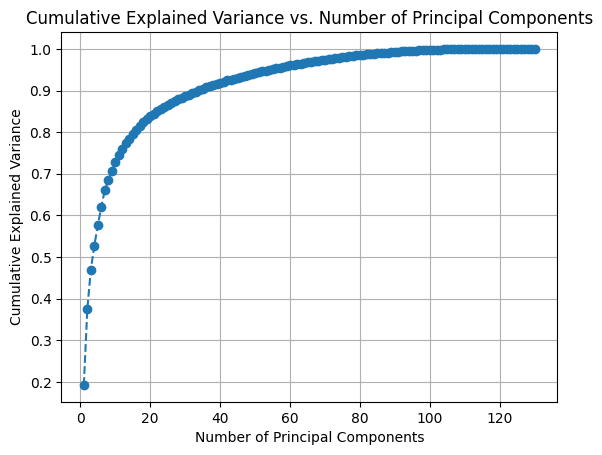

Principal Component 1: 0.1927
Principal Component 2: 0.1822
Principal Component 3: 0.0947
Principal Component 4: 0.0576
Principal Component 5: 0.0489
Principal Component 6: 0.0447
Principal Component 7: 0.0394
Principal Component 8: 0.0241
Principal Component 9: 0.0231
Principal Component 10: 0.0203
Principal Component 11: 0.0179
Principal Component 12: 0.0148
Principal Component 13: 0.0124
Principal Component 14: 0.0114
Principal Component 15: 0.0103
Principal Component 16: 0.0100
Principal Component 17: 0.0098
Principal Component 18: 0.0092
Principal Component 19: 0.0086
Principal Component 20: 0.0067
Principal Component 21: 0.0059
Principal Component 22: 0.0056
Principal Component 23: 0.0053
Principal Component 24: 0.0051
Principal Component 25: 0.0049
Principal Component 26: 0.0046
Principal Component 27: 0.0045
Principal Component 28: 0.0041
Principal Component 29: 0.0038
Principal Component 30: 0.0037
Principal Component 31: 0.0036
Principal Component 32: 0.0036
Principal Compone

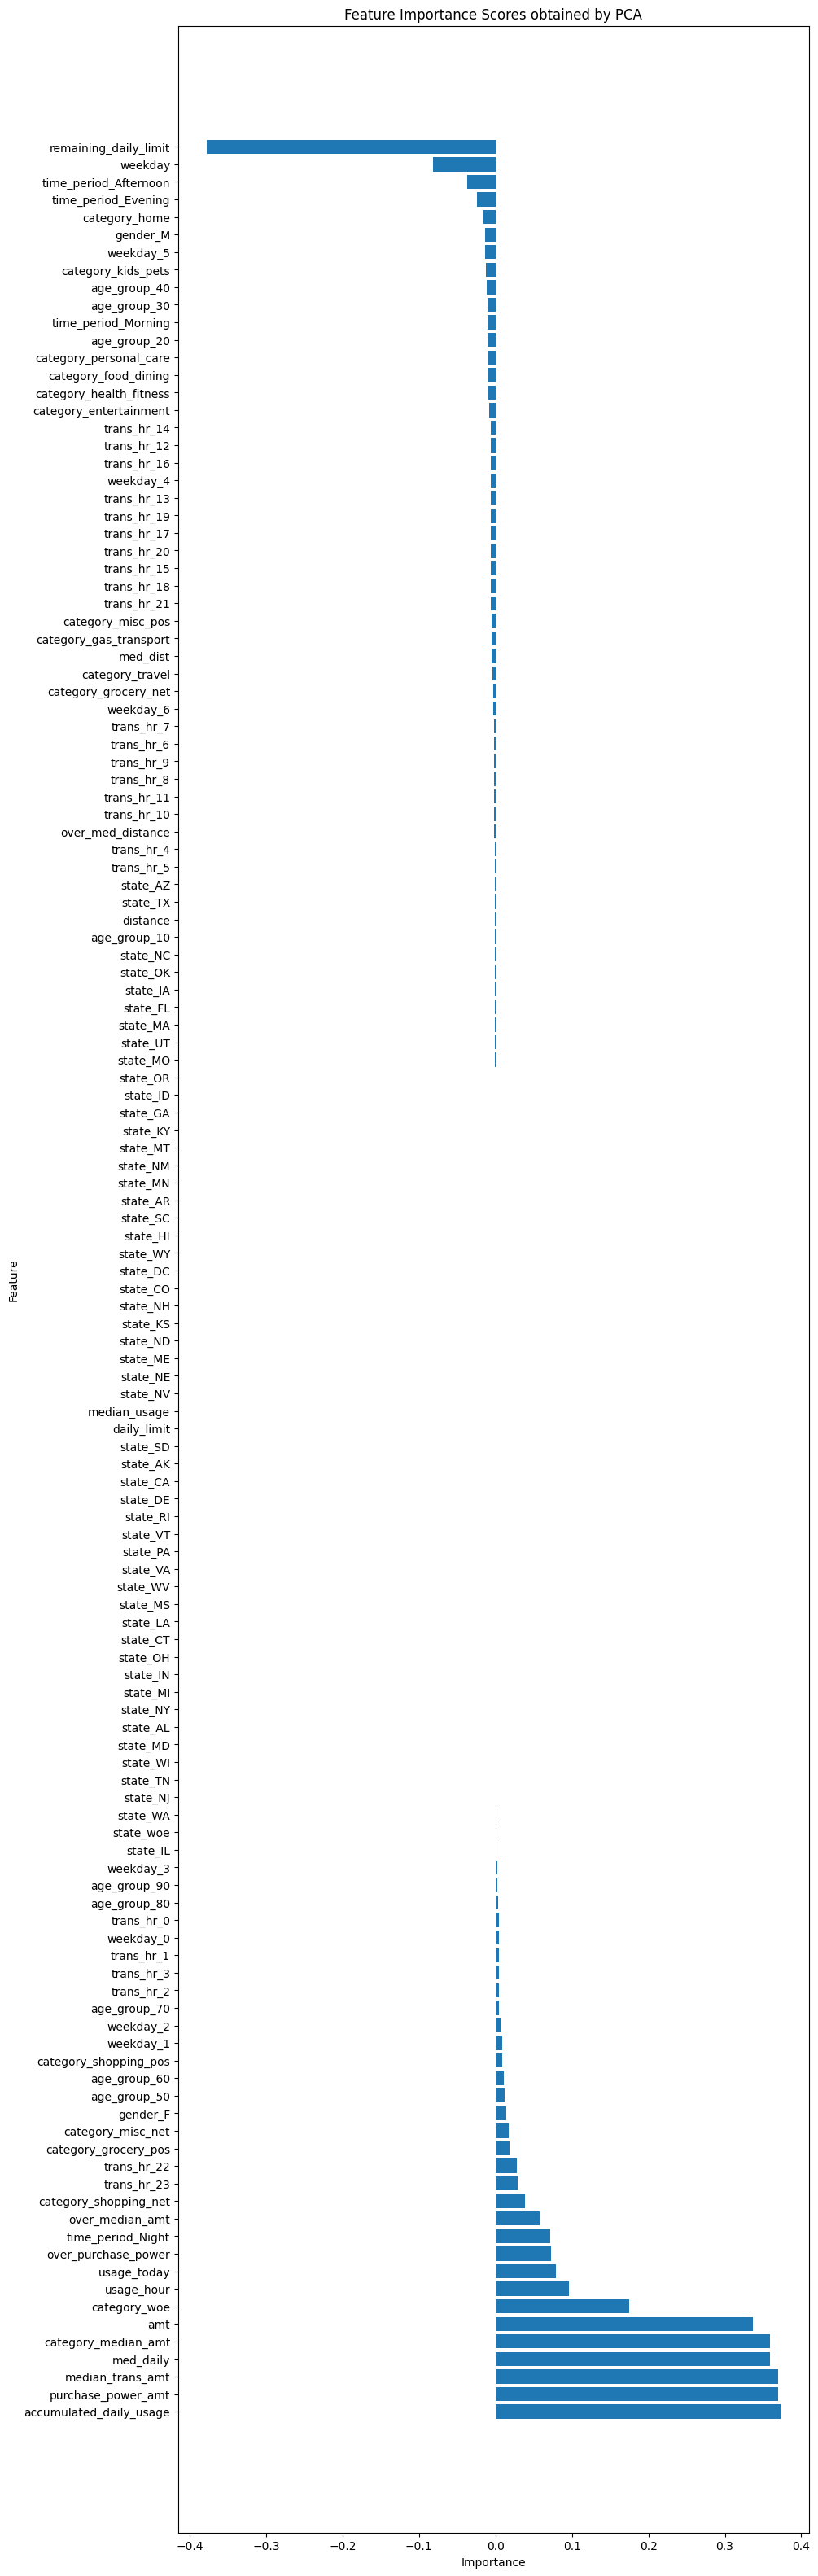

In [124]:
pca = PCA()
pca_df = XFE
pca.fit(pca_df)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.components_)


# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()

# Print the importance of each principal component
for i, variance in enumerate(explained_variance_ratio, 1):
    print(f"Principal Component {i}: {variance:.4f}")


# Get the feature names
feature_names = XFE.columns

# Create a DataFrame to store the results
pca_results = pd.DataFrame({
    'Feature': feature_names,
    'Importance': pca.components_[0]
})

# Sort the DataFrame by importance
pca_results = pca_results.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 40))
plt.barh(pca_results['Feature'], pca_results['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores obtained by PCA')
plt.show()

Feature Selection using XGBoost

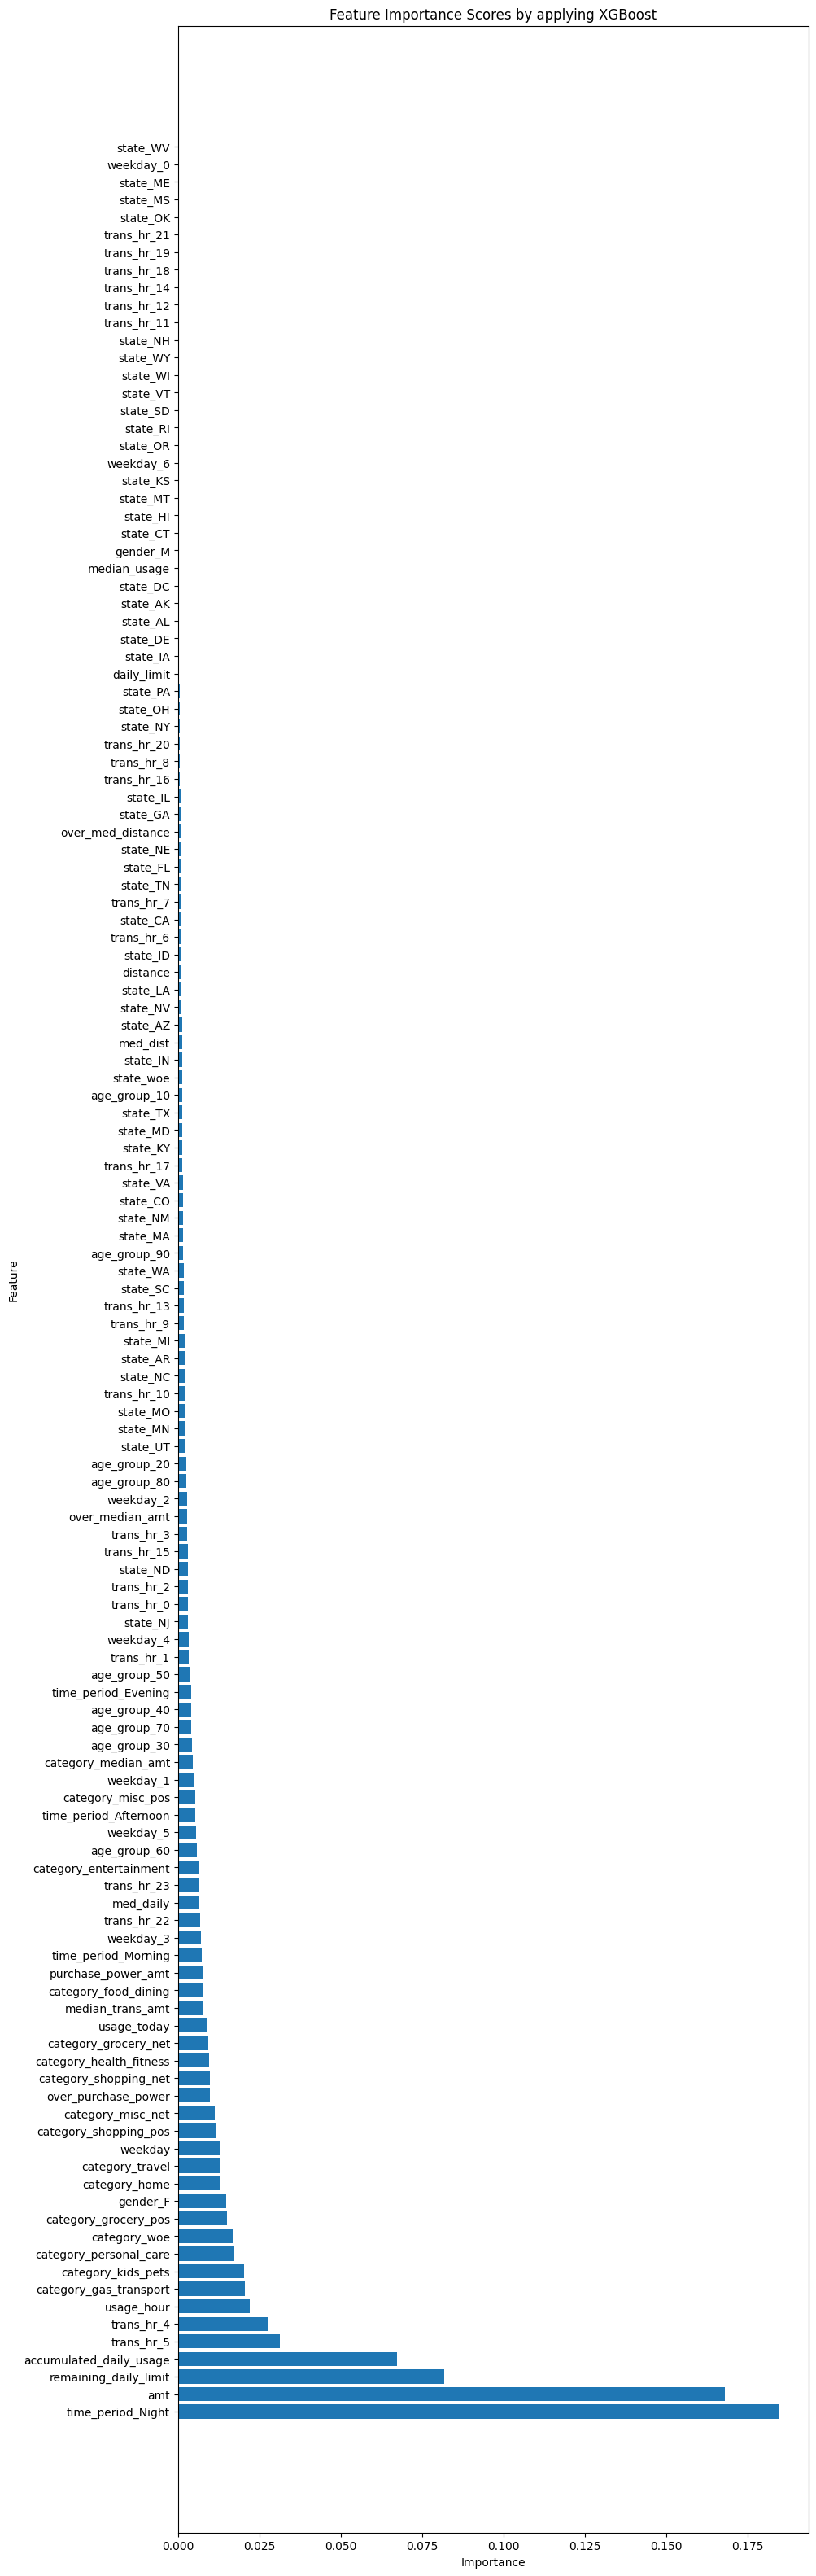

,Feature,Importance
94,time_period_Night,0.184432
0,amt,0.167905
4,remaining_daily_limit,0.081699
3,accumulated_daily_usage,0.067240
72,trans_hr_5,0.031172
...,...,...
52,state_OK,0.000000
41,state_MS,0.000000
37,state_ME,0.000000
96,weekday_0,0.000000


In [125]:
xgb_model = xgb.XGBClassifier(enable_categorical=True)
xgb_model.fit(XFE, yFE)
xgb_feature_importances = xgb_model.feature_importances_

xgb_feature_importance_df = pd.DataFrame({'Feature': XFE.columns, 'Importance': xgb_feature_importances})

# Sort the DataFrame by importance in descending order
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 40))
plt.barh(xgb_feature_importance_df['Feature'], xgb_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores by applying XGBoost')
plt.show()

xgb_feature_importance_df

In [126]:
xgb_feature_importance_df.T

,94,0,4,3,72,71,15,114,119,122,129,116,126,118,125,95,124,120,11,123,117,115,13,6,113,7,93,99,89,8,90,112,108,101,91,121,97,5,105,109,106,92,107,68,100,47,67,69,44,82,70,10,98,110,104,60,39,40,77,43,18,38,76,80,56,63,111,35,48,21,61,84,33,36,59,103,128,31,9,19,49,34,1,29,73,20,74,58,25,45,12,26,30,83,75,87,50,51,54,2,28,24,17,16,23,14,127,22,27,42,32,102,53,55,57,62,64,66,46,78,79,81,85,86,88,52,41,37,96,65
Feature,time_period_Night,amt,remaining_daily_limit,accumulated_daily_usage,trans_hr_5,trans_hr_4,usage_hour,category_gas_transport,category_kids_pets,category_personal_care,category_woe,category_grocery_pos,gender_F,category_home,category_travel,weekday,category_shopping_pos,category_misc_net,over_purchase_power,category_shopping_net,category_health_fitness,category_grocery_net,usage_today,median_trans_amt,category_food_dining,purchase_power_amt,time_period_Morning,weekday_3,trans_hr_22,med_daily,trans_hr_23,category_entertainment,age_group_60,weekday_5,time_period_Afternoon,category_misc_pos,weekday_1,category_median_amt,age_group_30,age_group_70,age_group_40,time_period_Evening,age_group_50,trans_hr_1,weekday_4,state_NJ,trans_hr_0,trans_hr_2,state_ND,trans_hr_15,trans_hr_3,over_median_amt,weekday_2,age_group_80,age_group_20,state_UT,state_MN,state_MO,trans_hr_10,state_NC,state_AR,state_MI,trans_hr_9,trans_hr_13,state_SC,state_WA,age_group_90,state_MA,state_NM,state_CO,state_VA,trans_hr_17,state_KY,state_MD,state_TX,age_group_10,state_woe,state_IN,med_dist,state_AZ,state_NV,state_LA,distance,state_ID,trans_hr_6,state_CA,trans_hr_7,state_TN,state_FL,state_NE,over_med_distance,state_GA,state_IL,trans_hr_16,trans_hr_8,trans_hr_20,state_NY,state_OH,state_PA,daily_limit,state_IA,state_DE,state_AL,state_AK,state_DC,median_usage,gender_M,state_CT,state_HI,state_MT,state_KS,weekday_6,state_OR,state_RI,state_SD,state_VT,state_WI,state_WY,state_NH,trans_hr_11,trans_hr_12,trans_hr_14,trans_hr_18,trans_hr_19,trans_hr_21,state_OK,state_MS,state_ME,weekday_0,state_WV
Importance,0.184432,0.167905,0.081699,0.06724,0.031172,0.027684,0.021889,0.02044,0.020194,0.01737,0.017098,0.015137,0.014682,0.013038,0.012882,0.012767,0.011614,0.011179,0.009843,0.009798,0.009583,0.009394,0.008798,0.007774,0.007678,0.007582,0.007333,0.006976,0.006738,0.006557,0.006512,0.006164,0.005876,0.005499,0.005267,0.005204,0.004738,0.004568,0.00433,0.004146,0.004065,0.004061,0.003625,0.003268,0.003171,0.003096,0.003039,0.002982,0.002955,0.002905,0.002881,0.002675,0.002668,0.002543,0.002521,0.00236,0.002062,0.001995,0.001987,0.001948,0.001923,0.001914,0.001884,0.001851,0.001708,0.001668,0.001596,0.001524,0.001493,0.001475,0.001452,0.001386,0.001372,0.001308,0.001243,0.001231,0.001216,0.001198,0.001174,0.001153,0.001123,0.001078,0.001044,0.001032,0.001021,0.00091,0.000874,0.000857,0.000753,0.000731,0.00071,0.0007,0.000689,0.000634,0.00056,0.000557,0.000527,0.000443,0.000401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Feature Selection using Random Forest

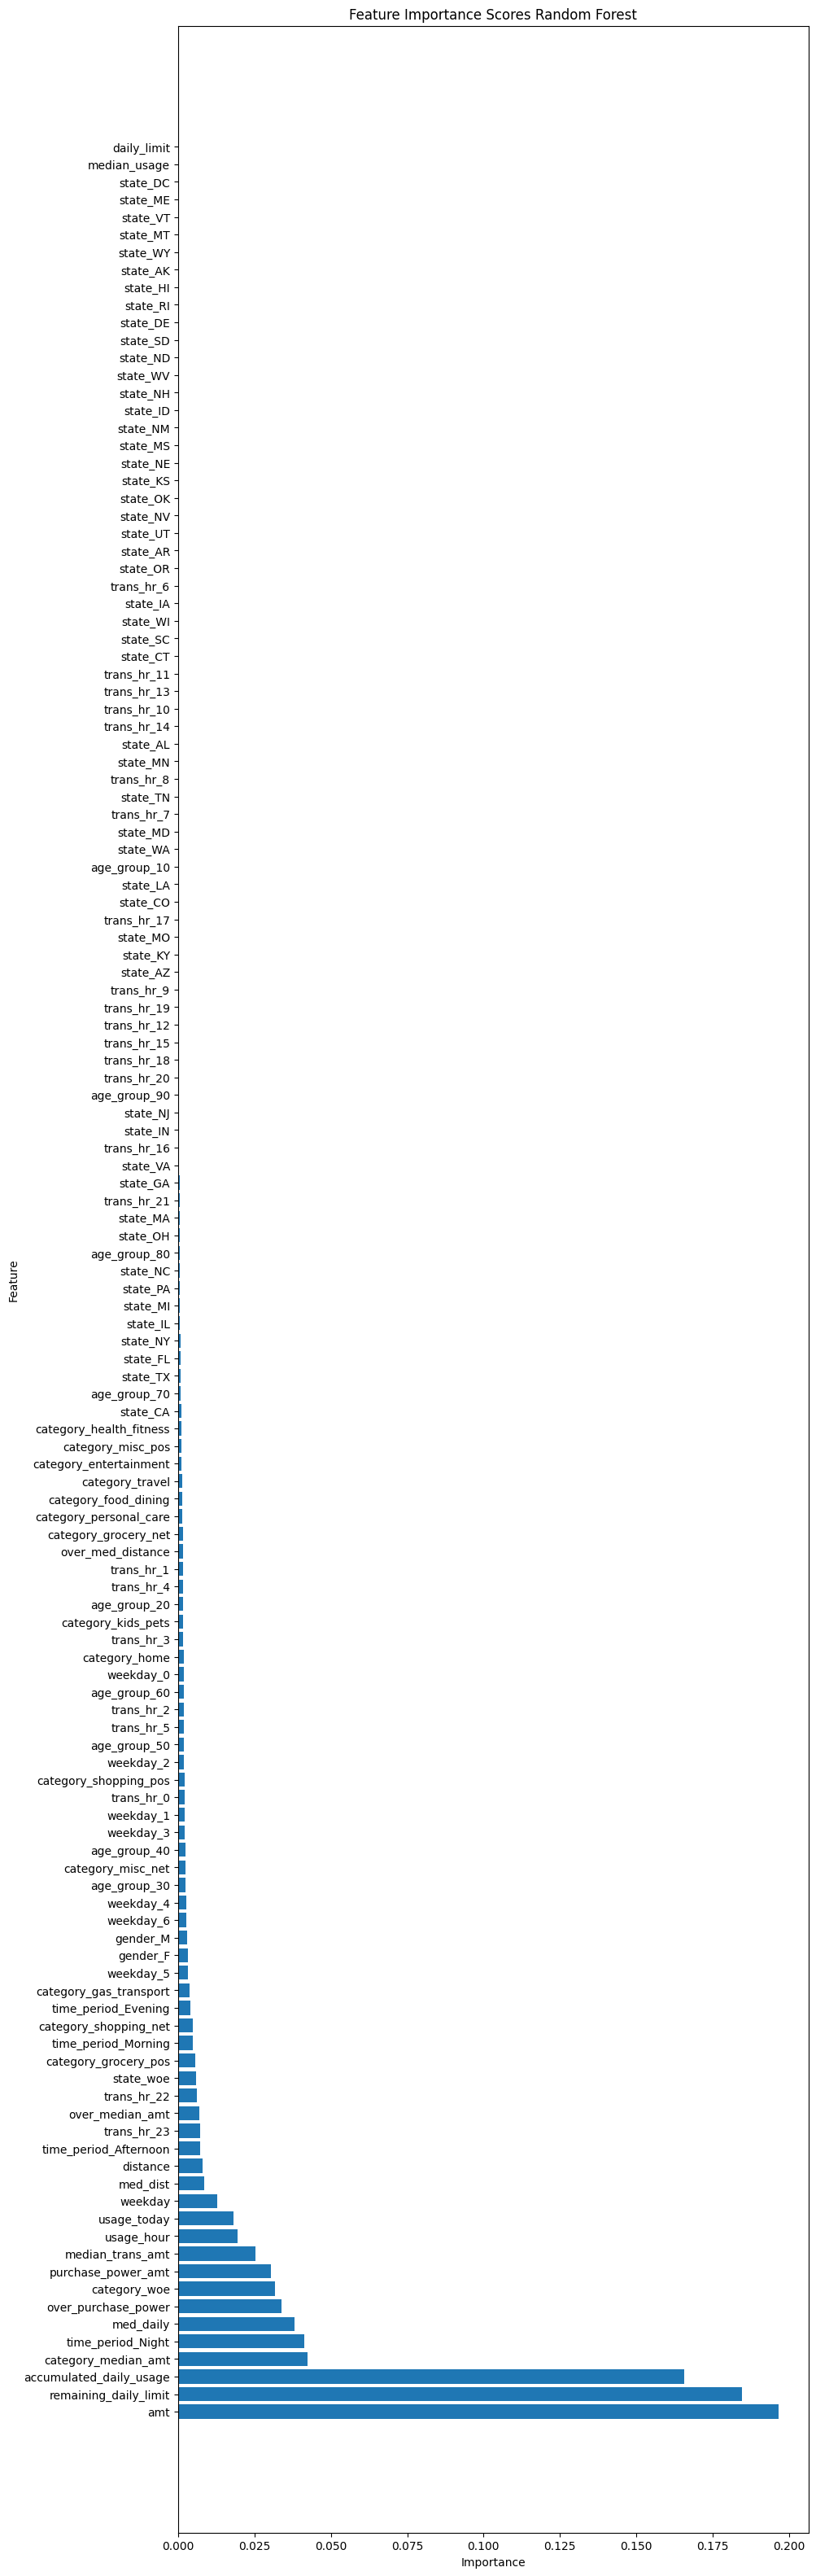

In [127]:
conditional_processesing = False
if conditional_processesing:
    ic('Set conditional_processesing to False to execute this')
    ic('Time Consuming Process')
else:
    #Extracting the features and target variables
    rfc_model = RandomForestClassifier(n_estimators=128) 
    rfc_model.fit(XFE, yFE)
    rfc_feature_importances = rfc_model.feature_importances_

    rfc_feature_importance_df = pd.DataFrame({'Feature': XFE.columns, 'Importance': rfc_feature_importances})

    # Sort the DataFrame by importance in descending order
    rfc_feature_importance_df = rfc_feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(10, 40))
    plt.barh(rfc_feature_importance_df['Feature'], rfc_feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Scores Random Forest')
    plt.show()

    rfc_feature_importance_df.T
conditional_processesing = True

Fitting estimator with 130 features.
Fitting estimator with 120 features.
Fitting estimator with 110 features.
Fitting estimator with 100 features.
Fitting estimator with 90 features.
Fitting estimator with 80 features.
Fitting estimator with 70 features.
Fitting estimator with 60 features.
Fitting estimator with 50 features.
Fitting estimator with 40 features.
Fitting estimator with 30 features.


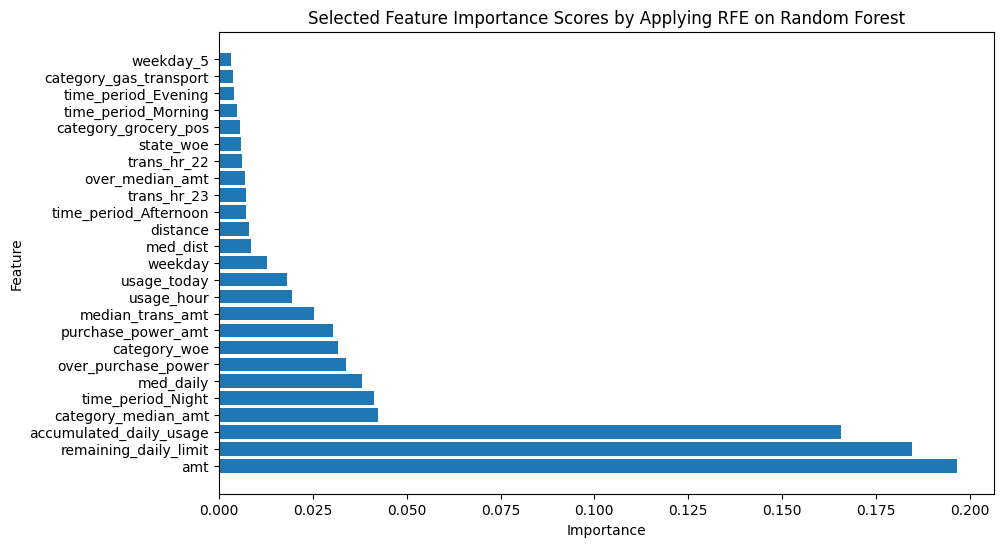

In [128]:
conditional_processesing = False
if conditional_processesing:
    ic('Set conditional_processesing to False to execute this')
    ic('Time Consuming Process')
else:
    rfe = RFE(estimator=rfc_model, n_features_to_select=25,verbose=1,step=10)
    rfe.fit(XFE,yFE)

    selected_features = XFE.columns[rfe.support_]
    selected_importances = rfc_feature_importance_df[rfc_feature_importance_df['Feature'].isin(selected_features)]

    # Sort the DataFrame by importance in descending order
    selected_importances = selected_importances.sort_values(by='Importance', ascending=False)

    # Plot the selected feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(selected_importances['Feature'], selected_importances['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Selected Feature Importance Scores by Applying RFE on Random Forest')
    plt.show()
conditional_processesing = True

In [129]:
# Create an instance of VarianceThreshold
selector = VarianceThreshold()

# Fit the selector to your feature matrix
XFE_train_selected = selector.fit_transform(XFE)

# Get the mask of selected features
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_features = [feature for i, feature in enumerate(XFE.columns) if selected_features_mask[i]]

# Now 'selected_features' contains the names of non-constant features
print(selected_features)

['amt', 'distance', 'accumulated_daily_usage', 'remaining_daily_limit', 'category_median_amt', 'median_trans_amt', 'purchase_power_amt', 'med_daily', 'med_dist', 'over_median_amt', 'over_purchase_power', 'over_med_distance', 'usage_today', 'usage_hour', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'trans_hr_0', 'trans_hr_1', 'trans_hr_2', 'trans_hr_3', 'trans_hr_4', 'trans_hr_5', 'trans_hr_6', 'trans_hr_7', 'trans_hr_8', 'trans_h

In [133]:
conditional_processesing = False
if conditional_processesing:
    ic('Set conditional_processesing to False to execute this')
    ic('Time Consuming Process')
else:
    # Create the MLPClassifier
    estimator = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', random_state=15)

    # Create a SelectKBest feature selector with a scoring function (e.g., f_classif)
    feature_selector = SelectKBest(score_func=f_classif, k=25)  # Adjust k as needed

    # Create the final pipeline
    final_pipeline = Pipeline([
        ('feature_selection', feature_selector),  # Feature selection with SelectKBest
        ('model', estimator)  # Neural network model
    ])

    # Fit the pipeline on the training data
    final_pipeline.fit(XFE_train, yFE_train)

    # Evaluate the model on the test data
    test_accuracy = final_pipeline.score(XFE_test, yFE_test)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

    # Get the indices of the selected features
    selected_feature_indices = feature_selector.get_support()

    # Get the names of the selected features
    feature_names = XFE_train.columns.tolist()
    selected_features = [feature_names[i] for i, is_selected in enumerate(selected_feature_indices) if is_selected]

    print("Selected Features:", selected_features)
conditional_processesing = True

Features [ 2 14] are constant.
invalid value encountered in divide
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Test Accuracy: 98.34%
Selected Features: ['amt', 'accumulated_daily_usage', 'remaining_daily_limit', 'category_median_amt', 'median_trans_amt', 'purchase_power_amt', 'med_daily', 'over_median_amt', 'over_purchase_power', 'usage_today', 'usage_hour', 'trans_hr_0', 'trans_hr_1', 'trans_hr_2', 'trans_hr_3', 'trans_hr_22', 'trans_hr_23', 'time_period_Afternoon', 'time_period_Evening', 'time_period_Morning', 'time_period_Night', 'category_grocery_pos', 'category_misc_net', 'category_shopping_net', 'category_woe']


In [132]:
XFE_train

,amt,distance,daily_limit,accumulated_daily_usage,remaining_daily_limit,category_median_amt,median_trans_amt,purchase_power_amt,med_daily,med_dist,over_median_amt,over_purchase_power,over_med_distance,usage_today,median_usage,usage_hour,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,trans_hr_0,trans_hr_1,trans_hr_2,trans_hr_3,trans_hr_4,trans_hr_5,trans_hr_6,trans_hr_7,trans_hr_8,trans_hr_9,trans_hr_10,trans_hr_11,trans_hr_12,trans_hr_13,trans_hr_14,trans_hr_15,trans_hr_16,trans_hr_17,trans_hr_18,trans_hr_19,trans_hr_20,trans_hr_21,trans_hr_22,trans_hr_23,time_period_Afternoon,time_period_Evening,time_period_Morning,time_period_Night,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,age_group_10,age_group_20,age_group_30,age_group_40,age_group_50,age_group_60,age_group_70,age_group_80,age_group_90,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,state_woe,category_woe
114136,-0.480397,0.943682,0.0,-0.483445,0.509699,-0.485419,-0.216757,-0.434697,-0.144207,-0.187414,0,0,1,0.030035,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.025109,-0.955986
148950,-0.486562,0.182932,0.0,-0.490232,0.516989,-0.073139,-0.073019,-0.352637,-0.140780,-0.234604,0,0,1,-1.051982,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.025166,-1.256145
189132,-0.464021,0.315978,0.0,-0.471733,0.497119,-0.427927,-0.288322,-0.451402,-0.114905,-0.347860,0,0,1,0.390707,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.025109,-1.311050
243733,-0.487256,0.691235,0.0,-0.490448,0.517221,-0.452199,-0.208509,-0.461097,-0.279536,-0.687627,0,0,1,0.751380,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-0.066694,-0.748444
358732,-0.028814,-1.870751,0.0,-0.251159,0.260203,-0.224770,-0.068410,-0.307980,-0.294145,-0.593247,1,1,0,0.751380,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-0.026268,-0.748444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79455,-0.314675,-0.625578,0.0,-0.266619,0.276808,-0.348495,-0.319981,-0.485433,-0.237018,-0.

<h3>For the above plots we can infer that the main features which we require from our data are as follows: </h3>
<ul>Transaction Amount</ul>
<ul>Accumulated Daily Usage</ul>
<ul>Transaction Time</ul>
<ul>Merchant Category</ul>
<ul>Time Period during Day</ul>
<ul>Weekday</ul>
<ul>Weight of Evidence on Category</ul>
<ul>Weight of Evidence on State</ul>

<h2>Other important obervations form these are as follows:</h3>
<h3>The features which can lead to bias, in form Gender, Age and Customer Location (State/ City) are having no significant impact on the target variable. We can safely say that this model is not baised</h2>

Extracting the features and target variables

In [214]:
#Extracting the features and target variables
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)

WOE for State and Category

In [215]:
# Initialize and fit the WOEEncoder on the training & test data for State
woe_state_encoder = ce.WOEEncoder(cols=['state'])
woe_state_encoder.fit(X_train, y_train)

# Save the encoder to a pickle file
woe_state_encoder_filename = 'woe_state_encoder.pkl'
joblib.dump(woe_state_encoder, woe_state_encoder_filename)

# Load the encoder from the pickle file
loaded_woe_state_encoder = joblib.load(woe_state_encoder_filename)

# Transform both the training and test data using the loaded encoder
X_train_woe_state_encoded = loaded_woe_state_encoder.transform(X_train)
X_test_woe_state_encoded = loaded_woe_state_encoder.transform(X_test)

# Add WoE values back to the original DataFrames
X_train['state_woe'] = X_train_woe_state_encoded['state']
X_test['state_woe'] = X_test_woe_state_encoded['state']
X_train.drop(['state'],axis=1,inplace=True)
X_test.drop(['state'],axis=1,inplace=True)

In [216]:
# Initialize and fit the WOEEncoder on the training & test data for Merchant Category
woe_category_encoder = ce.WOEEncoder(cols=['category'])
woe_category_encoder.fit(X_train, y_train)

# Save the encoder to a pickle file
woe_category_encoder_filename = 'woe_category_encoder.pkl'
joblib.dump(woe_category_encoder, woe_category_encoder_filename)

# Load the encoder from the pickle file
loaded_woe_category_encoder = joblib.load(woe_category_encoder_filename)

# Transform both the training and test data using the loaded encoder
X_train_woe_category_encoded = loaded_woe_category_encoder.transform(X_train)
X_test_woe_category_encoded = loaded_woe_category_encoder.transform(X_test)

# Add WoE values back to the original DataFrames
X_train['category_woe'] = X_train_woe_category_encoded['category']
X_test['category_woe'] = X_test_woe_category_encoded['category']

In [217]:
X_train.head(1)

,ssn,cc_num,first,last,street,city,zip,lat,long,city_pop,job,acct_num,profile,trans_num,trans_date,unix_time,category,amt,merchant,merch_lat,merch_long,trans_date_time,distance,daily_limit,accumulated_daily_usage,remaining_daily_limit,category_median_amt,median_trans_amt,purchase_power_amt,med_daily,med_dist,q75_dist,over_median_amt,over_purchase_power,over_med_distance,usage_today,median_usage,usage_hour,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,trans_hr,trans_hr_0,trans_hr_1,trans_hr_2,trans_hr_3,trans_hr_4,trans_hr_5,trans_hr_6,trans_hr_7,trans_hr_8,trans_hr_9,trans_hr_10,trans_hr_11,trans_hr_12,trans_hr_13,trans_hr_14,trans_hr_15,trans_hr_16,trans_hr_17,trans_hr_18,trans_hr_19,trans_hr_20,trans_hr_21,trans_hr_22,trans_hr_23,time_period_Afternoon,time_period_Evening,time_period_Morning,time_period_Night,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,age,age_group,age_group_10,age_group_20,age_group_30,age_group_40,age_group_50,age_group_60,age_group_70,age_group_80,age_group_90,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,state_woe,category_woe
114136,233-83-2308,3569893652944716,Jason,Oconnor,3481 Rachel Stream,Lakewood,44107,41.4847,-81.8018,52244,Building services engineer,283620405974,adults_2550_male_urban.json,d26c11f84ea821897e2cb74fa7281814,2023-09-29,1695984137,personal_care,3.59,fraud_Prosacco LLC,42.20895,-82.601343,2023-09-29 16:12:17,10.43,5000,7.64,4992.36,10.875,41.06,71.14,141.03,7.795,9.4975,0,0,1,5,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,1,0,0,44,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.05118,-0.964921


In [218]:
data_pipeline_post_feature_engg = Pipeline([
    ('customer_profile',CustomerProfileTransformer()),
    ('scale_data',StandardScalerTransformer(['amt','accumulated_daily_usage','remaining_daily_limit','purchase_power_amt','med_daily','category_median_amt','median_trans_amt','usage_today'])),
    ('drop_columns', ColumnDropTransformer(['ssn','cc_num','first','last','gender','street','city','zip','job','dob','acct_num','profile','trans_num','trans_date','trans_time','unix_time','merchant','lat','long','merch_lat','merch_long','trans_date_time','age','age_group','category','city_pop','q75_dist','distance','med_dist','median_usage','usage_hour','weekday','trans_hr','state_AK','state_AL','state_AR','state_AZ','state_CA','state_CO','state_CT','state_DC','state_DE','state_FL','state_GA','state_HI','state_IA','state_ID','state_IL','state_IN','state_KS','state_KY','state_LA','state_MA','state_MD','state_ME','state_MI','state_MN','state_MO','state_MS','state_MT','state_NC','state_ND','state_NE','state_NH','state_NJ','state_NM','state_NV','state_NY','state_OH','state_OK','state_OR','state_PA','state_RI','state_SC','state_SD','state_TN','state_TX','state_UT','state_VA','state_VT','state_WA','state_WI','state_WV','state_WY','age_group_10','age_group_20','age_group_30','age_group_40','age_group_50','age_group_60','age_group_70','age_group_80','age_group_90','gender_F','gender_M','daily_limit','over_med_distance']))
])

In [219]:
#Scaling the X_train data
X_train_scaled = data_pipeline_post_feature_engg.fit_transform(X_train)
X_train = X_train_scaled.copy()
clean_df(X_train_scaled)
skim_data(X_train)

ic| 'CustomerProfileTransformer :', elapsed_time: 1.951, ' seconds'
ic| 'StandardScalerTransformer :', elapsed_time: 0.3, ' seconds'
ic| 'ColumnDropTransformer :', elapsed_time: 0.047, ' seconds'


**********************************************************************

Skimming for amt
	Number of Null Values found : 0
	Number of Unique values found : 48173
**********************************************************************
**********************************************************************

Skimming for accumulated_daily_usage
	Number of Null Values found : 0
	Number of Unique values found : 100652
**********************************************************************
**********************************************************************

Skimming for remaining_daily_limit
	Number of Null Values found : 0
	Number of Unique values found : 88357
**********************************************************************
**********************************************************************

Skimming for category_median_amt
	Number of Null Values found : 0
	Number of Unique values found : 27240
**********************************************************************
*****************

In [220]:
X_train.head(1)

,amt,accumulated_daily_usage,remaining_daily_limit,category_median_amt,median_trans_amt,purchase_power_amt,med_daily,over_median_amt,over_purchase_power,usage_today,trans_hr_0,trans_hr_1,trans_hr_2,trans_hr_3,trans_hr_4,trans_hr_5,trans_hr_6,trans_hr_7,trans_hr_8,trans_hr_9,trans_hr_10,trans_hr_11,trans_hr_12,trans_hr_13,trans_hr_14,trans_hr_15,trans_hr_16,trans_hr_17,trans_hr_18,trans_hr_19,trans_hr_20,trans_hr_21,trans_hr_22,trans_hr_23,time_period_Afternoon,time_period_Evening,time_period_Morning,time_period_Night,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_woe,category_woe
114136,-0.476386,-0.482273,0.509498,-0.485322,-0.216589,-0.434413,-0.144144,0,0,0.029644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.05118,-0.964921


In [221]:
#Scaling the X_test
X_test_scaled = data_pipeline_post_feature_engg.transform(X_test)
X_test = X_test_scaled.copy()
clean_df(X_test_scaled)
skim_data(X_test_scaled)

ic| 'CustomerProfileTransformer :', elapsed_time: 0.539, ' seconds'
ic| 'StandardScalerTransformer :', elapsed_time: 0.099, ' seconds'
ic| 'ColumnDropTransformer :', elapsed_time: 0.018, ' seconds'


**********************************************************************

Skimming for amt
	Number of Null Values found : 0
	Number of Unique values found : 24348
**********************************************************************
**********************************************************************

Skimming for accumulated_daily_usage
	Number of Null Values found : 0
	Number of Unique values found : 43592
**********************************************************************
**********************************************************************

Skimming for remaining_daily_limit
	Number of Null Values found : 0
	Number of Unique values found : 41187
**********************************************************************
**********************************************************************

Skimming for category_median_amt
	Number of Null Values found : 0
	Number of Unique values found : 20322
**********************************************************************
******************

In [223]:
X_test.head(1)

,amt,accumulated_daily_usage,remaining_daily_limit,category_median_amt,median_trans_amt,purchase_power_amt,med_daily,over_median_amt,over_purchase_power,usage_today,trans_hr_0,trans_hr_1,trans_hr_2,trans_hr_3,trans_hr_4,trans_hr_5,trans_hr_6,trans_hr_7,trans_hr_8,trans_hr_9,trans_hr_10,trans_hr_11,trans_hr_12,trans_hr_13,trans_hr_14,trans_hr_15,trans_hr_16,trans_hr_17,trans_hr_18,trans_hr_19,trans_hr_20,trans_hr_21,trans_hr_22,trans_hr_23,time_period_Afternoon,time_period_Evening,time_period_Morning,time_period_Night,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_woe,category_woe
353176,-0.428105,-0.416039,0.438176,-0.275274,-0.209026,-0.232634,-0.324939,0,0,-0.692439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.069265,-0.926409


In [224]:
#Combining them back to perform Feature Section, we will keep the X_train, X_test, y_train and y_test as is for further processing.
#X = pd.concat([X_train, X_test], axis=0)
#y = pd.concat([y_train,y_test], axis=0)
# Reset the index of the combined dataframe
#X.reset_index(drop=True, inplace=True)
#y.reset_index(drop=True, inplace=True)

In [225]:
#We will first process the data using RandomForest and XGBoost, post that we will use ANN.

#Idea for NN Structure with Sigmoid at Output Layer
#256 128 64 32 16 1 

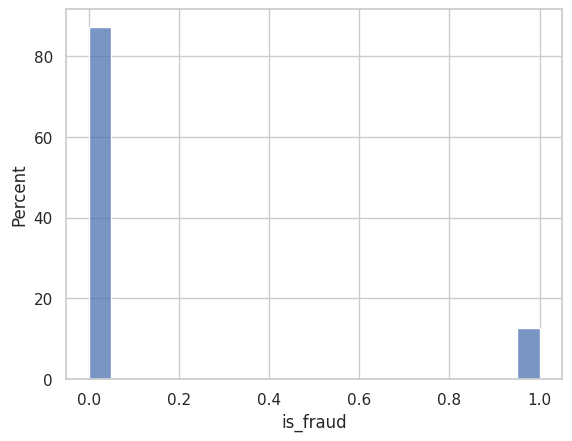

In [226]:
sns.histplot(x='is_fraud',data = df,stat='percent')
plt.show()

We will now drop the columns which are no longer required

In [227]:
X_train.head()

,amt,accumulated_daily_usage,remaining_daily_limit,category_median_amt,median_trans_amt,purchase_power_amt,med_daily,over_median_amt,over_purchase_power,usage_today,trans_hr_0,trans_hr_1,trans_hr_2,trans_hr_3,trans_hr_4,trans_hr_5,trans_hr_6,trans_hr_7,trans_hr_8,trans_hr_9,trans_hr_10,trans_hr_11,trans_hr_12,trans_hr_13,trans_hr_14,trans_hr_15,trans_hr_16,trans_hr_17,trans_hr_18,trans_hr_19,trans_hr_20,trans_hr_21,trans_hr_22,trans_hr_23,time_period_Afternoon,time_period_Evening,time_period_Morning,time_period_Night,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,state_woe,category_woe
114136,-0.476386,-0.482273,0.509498,-0.485322,-0.216589,-0.434413,-0.144144,0,0,0.029644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.051180,-0.964921
148950,-0.482498,-0.489042,0.516786,-0.073982,-0.073191,-0.352402,-0.140730,0,0,-1.053481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.017705,-1.261413
189132,-0.460153,-0.470593,0.496921,-0.427961,-0.287986,-0.451108,-0.114951,0,0,0.390685,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.051180,-1.303662
243733,-0.483185,-0.489257,0.517019,-0.452178,-0.208361,-0.460796,-0.278972,0,0,0.751727,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.082870,-0.754087
358732,-0.028719,-0.250627,0.260059,-0.225267,-0.068593,-0.307772,-0.293526,1,1,0.751727,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.048714,-0.754087


<function matplotlib.pyplot.show(close=None, block=None)>

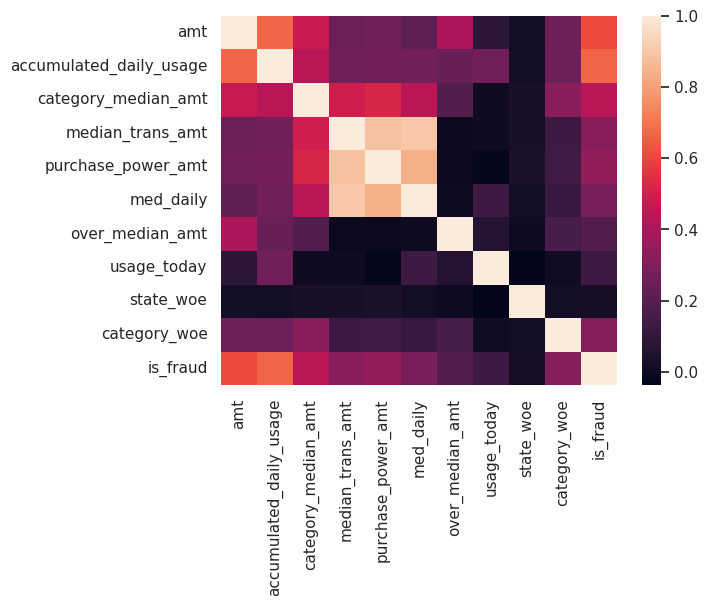

In [228]:
columns_without_merchant_and_date_time = ['amt','accumulated_daily_usage','category_median_amt','median_trans_amt','purchase_power_amt','med_daily','over_median_amt','usage_today','state_woe','category_woe']
X_train_for_corr = X_train[columns_without_merchant_and_date_time]
X_test_for_corr = X_test[columns_without_merchant_and_date_time]

#Combining them back to perform Feature Section, we will keep the X_train, X_test, y_train and y_test as is for further processing.
X_corr = pd.concat([X_train_for_corr, X_test_for_corr], axis=0)
y_corr = pd.concat([y_train,y_test], axis=0)
# Reset the index of the combined dataframe
X_corr.reset_index(drop=True, inplace=True)
y_corr.reset_index(drop=True, inplace=True)
df_corr = pd.concat([X_corr,y_corr],axis=1)


sns.heatmap(df_corr.corr())
plt.show

X.train.columns()

<function matplotlib.pyplot.show(close=None, block=None)>

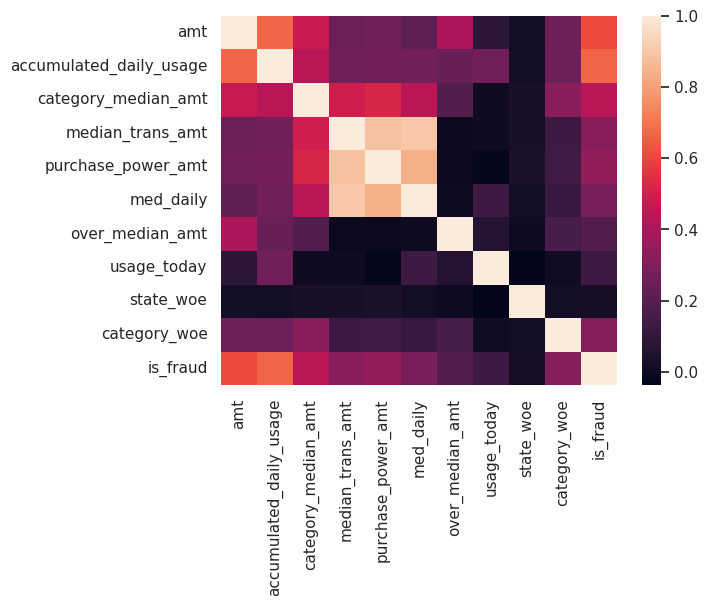

In [229]:
sns.heatmap(df_corr.corr())
plt.show

<Figure size 1600x1200 with 0 Axes>

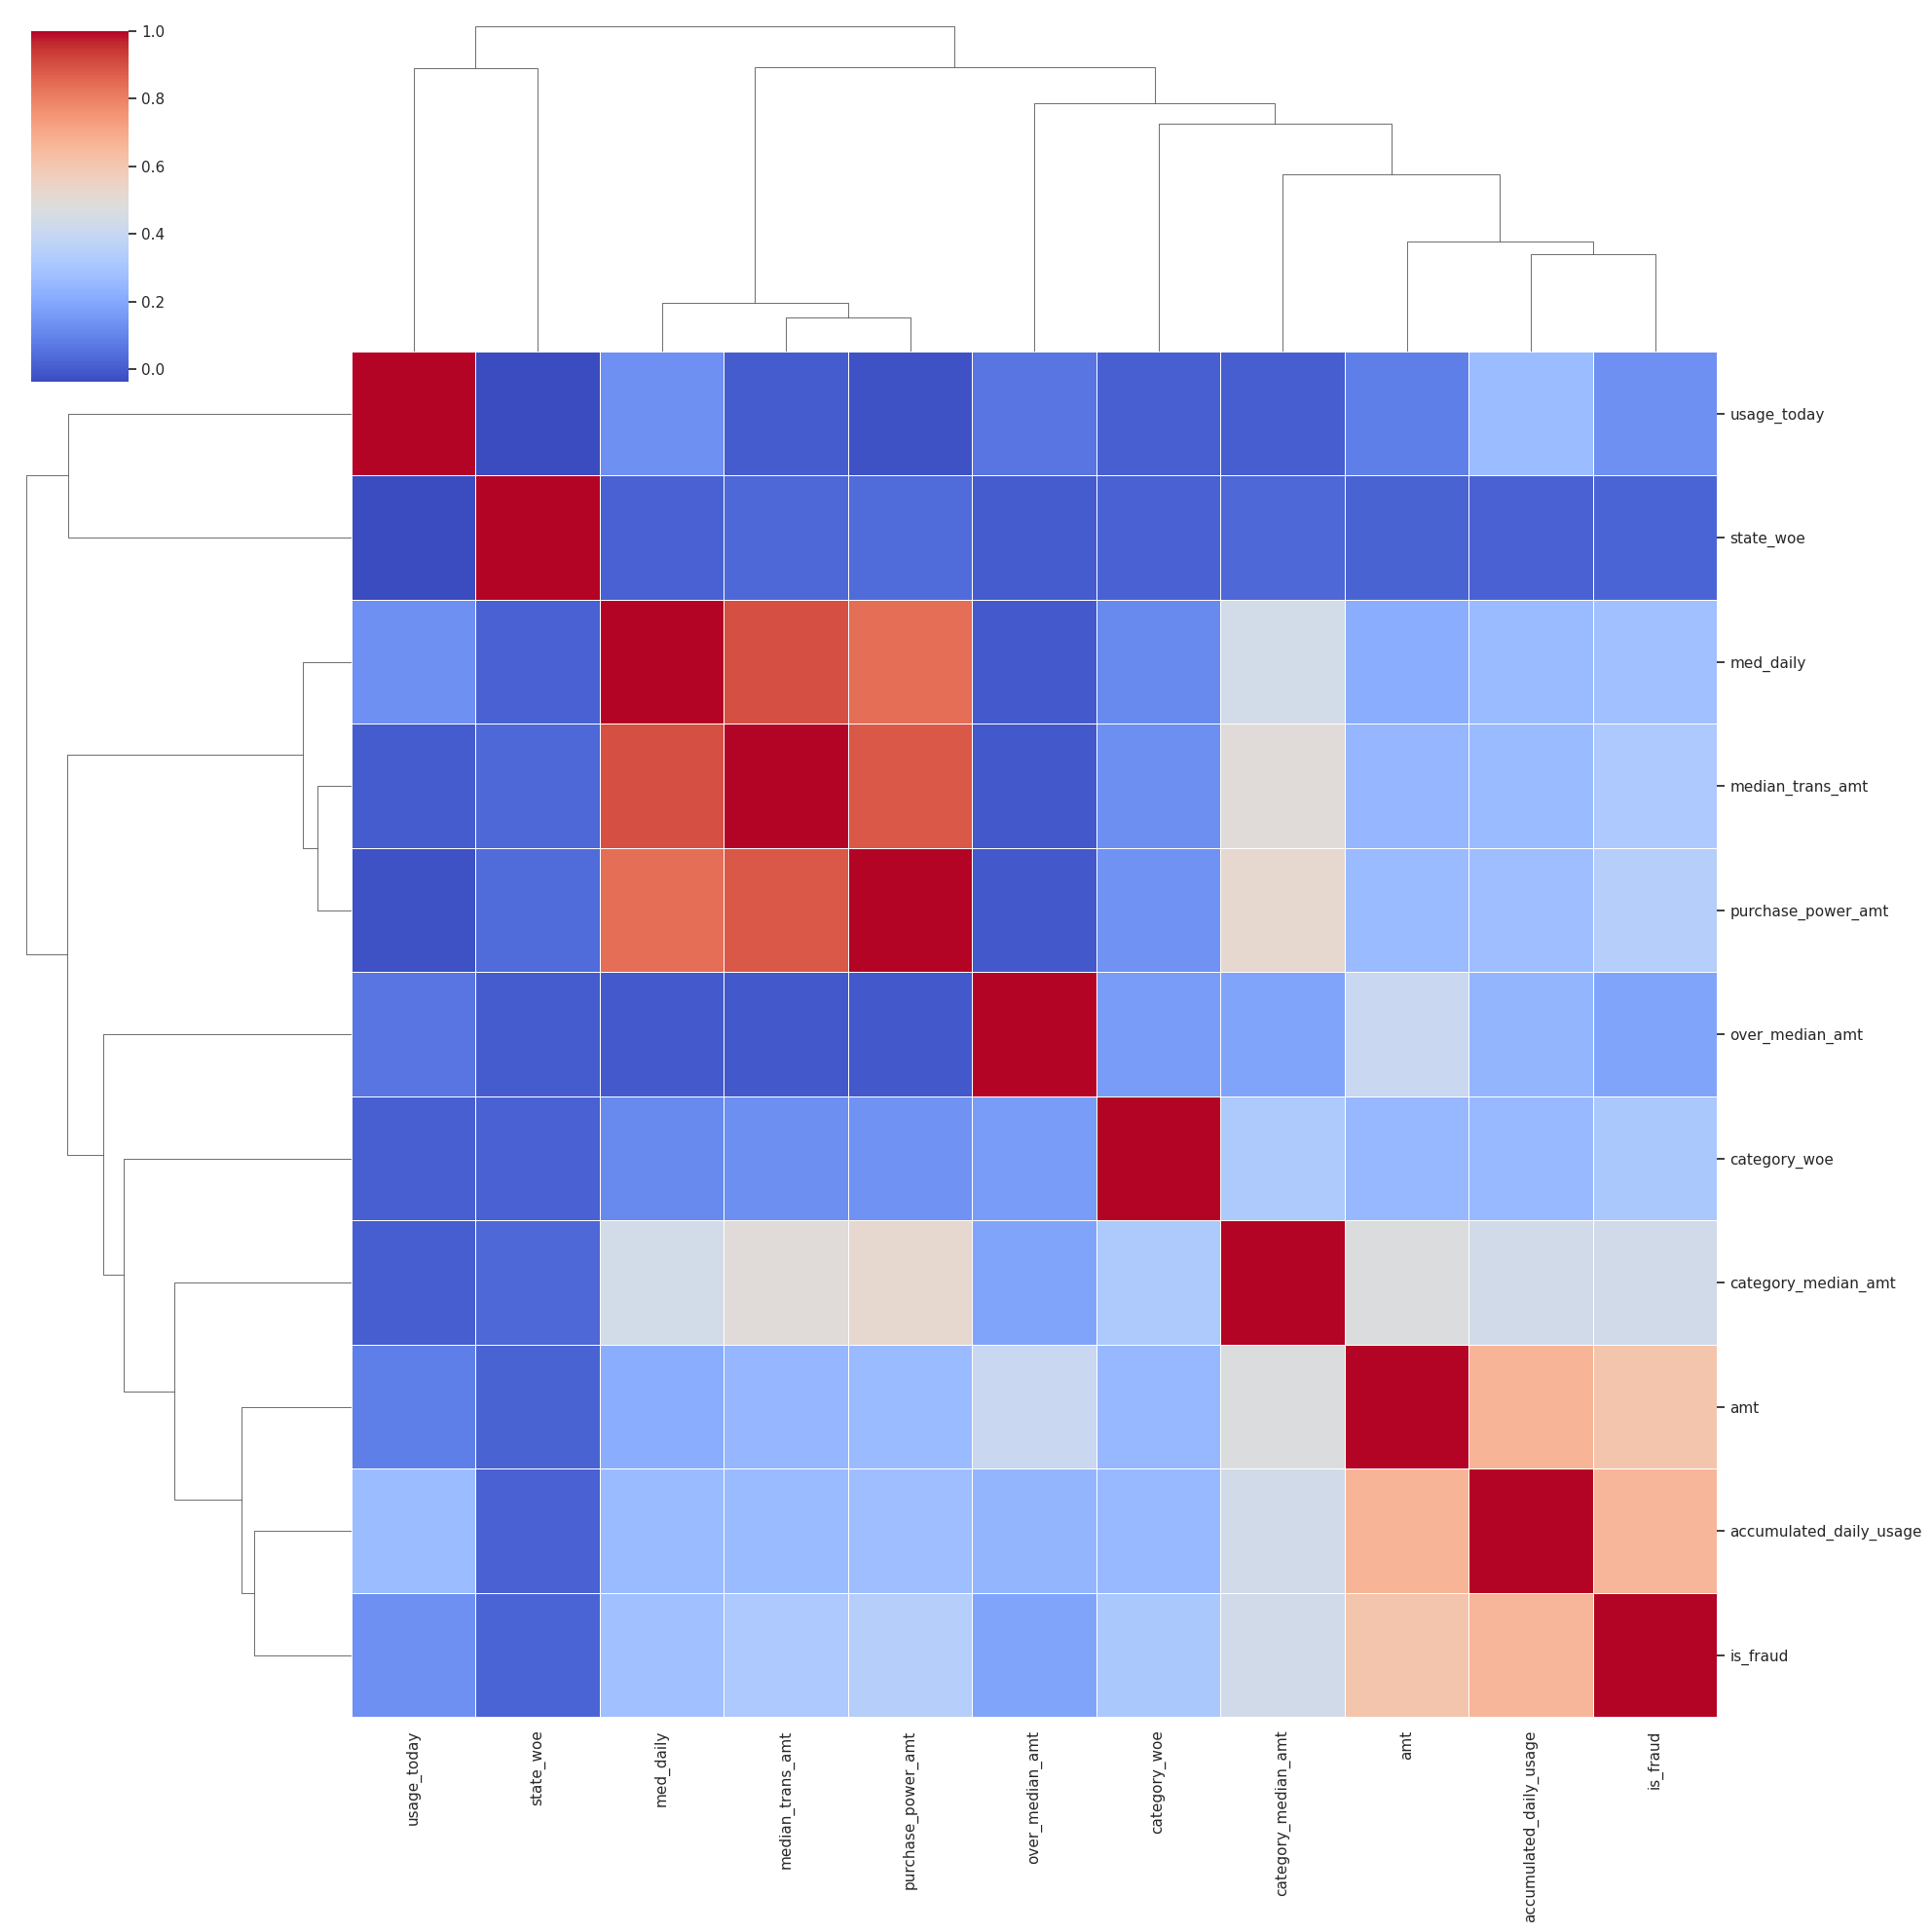

In [230]:
correlation_matrix = df_corr.corr()
plt.figure(figsize=(16, 12))

# Create a clustered heatmap
sns.clustermap(correlation_matrix, cmap='coolwarm', linewidths=0.5, figsize=(20, 20))

# Display the plot
plt.show()

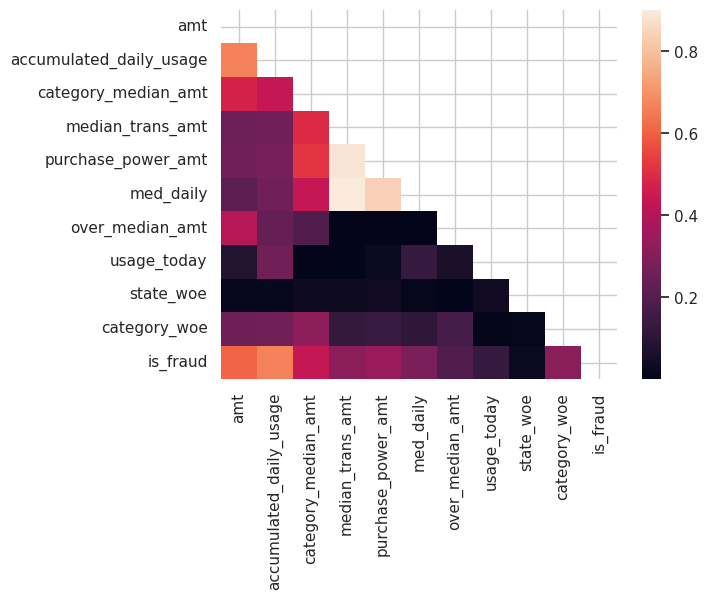

In [231]:
#We will explore further on the corelation
corr_df = df_corr.corr().abs()
mask=np.triu(np.ones_like(corr_df,dtype=bool))
triu_df = corr_df.mask(mask)
sns.heatmap(triu_df,mask=mask)
plt.show()

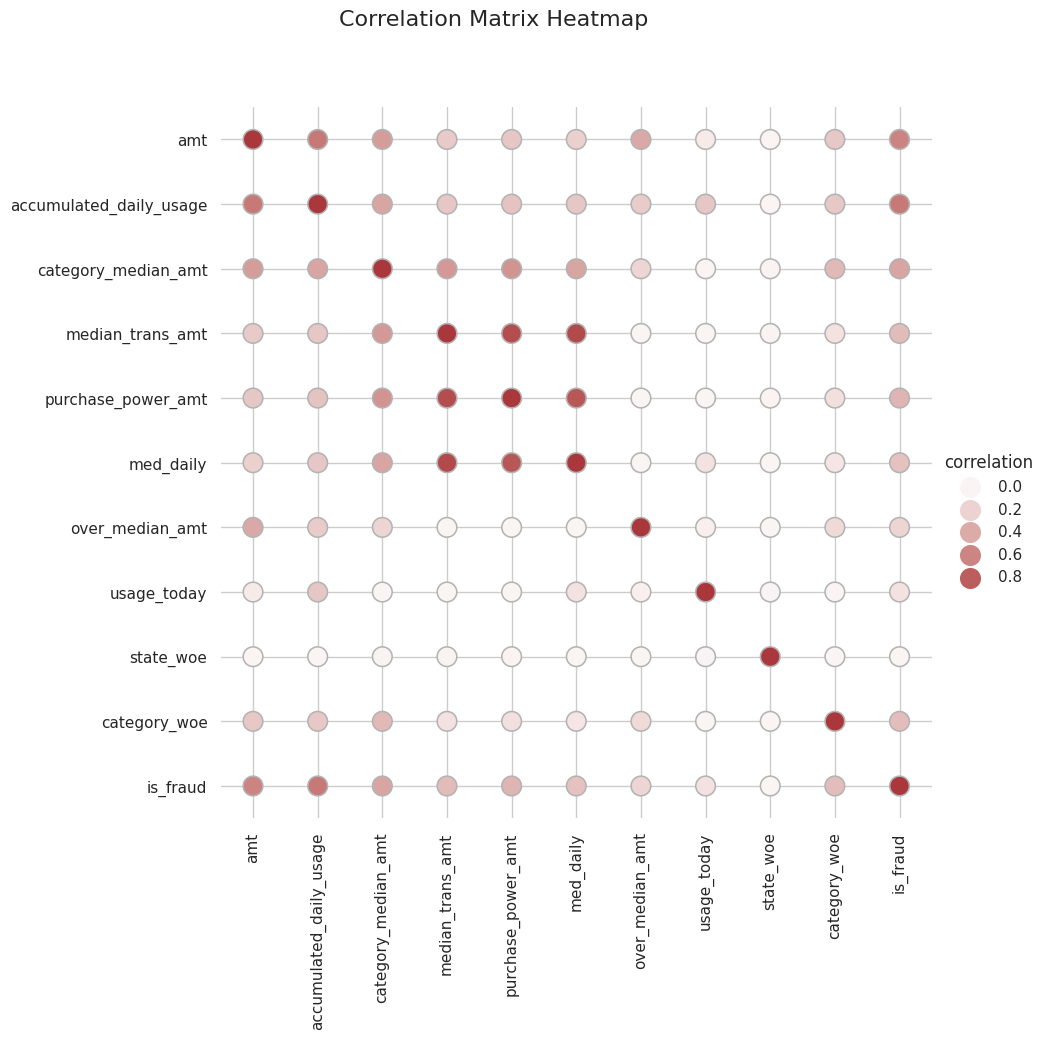

In [232]:
sns.set_theme(style="whitegrid")
# Compute a correlation matrix and convert to long-form
corr_mat = df_corr.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(200, 200), size_norm=(-.2, .8),
)

g.fig.suptitle("Correlation Matrix Heatmap", fontsize=16)
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.05)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

In [233]:
X.head(2)

,ssn,cc_num,first,last,street,city,state,zip,lat,long,city_pop,job,acct_num,profile,trans_num,trans_date,unix_time,category,amt,merchant,merch_lat,merch_long,trans_date_time,distance,daily_limit,accumulated_daily_usage,remaining_daily_limit,category_median_amt,median_trans_amt,purchase_power_amt,med_daily,med_dist,q75_dist,over_median_amt,over_purchase_power,over_med_distance,usage_today,median_usage,usage_hour,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,trans_hr,trans_hr_0,trans_hr_1,trans_hr_2,trans_hr_3,trans_hr_4,trans_hr_5,trans_hr_6,trans_hr_7,trans_hr_8,trans_hr_9,trans_hr_10,trans_hr_11,trans_hr_12,trans_hr_13,trans_hr_14,trans_hr_15,trans_hr_16,trans_hr_17,trans_hr_18,trans_hr_19,trans_hr_20,trans_hr_21,trans_hr_22,trans_hr_23,time_period_Afternoon,time_period_Evening,time_period_Morning,time_period_Night,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,age,age_group,age_group_10,age_group_20,age_group_30,age_group_40,age_group_50,age_group_60,age_group_70,age_group_80,age_group_90,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M
0,023-06-5223,6533284222162912,Sophia,Smith,23135 Bush Station,Miami,FL,33185,25.7274,-80.4497,1737737,Biomedical engineer,904250386934,adults_50up_female_urban.json,df07dd36feb17afd4aad30d83f035182,2023-09-03,1693701077,grocery_net,49.00,fraud_Kutch-Hegmann,26.456768,-79.923676,2023-09-03 06:01:17,9.66,5000,49.00,4951.00,26.71,54.58,97.775,151.32,8.92,10.96,0,0,1,7,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,1,74,70,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,023-06-5223,6533284222162912,Sophia,Smith,23135 Bush Station,Miami,FL,33185,25.7274,-80.4497,1737737,Biomedical engineer,904250386934,adults_50up_female_urban.json,d92151d98c4ea139dfef91c3e071a850,2023-09-22,1695326529,grocery_pos,13.66,fraud_Kuhic Inc,24.798824,-80.789214,2023-09-22 01:32:09,10.88,5000,13.66,4986.34,11.55,54.58,97.775,151.32,8.92,10.96,0,0,1,7,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,1,0,0,74,70,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [212]:
sample_train_df = pd.concat([X_train.head(20),y_train.head(20)],axis=1)
sample_test_df = pd.concat([X_test.head(20),y_test.head(20)],axis=1)
sample_train_df.to_csv('sample_train_df.csv',index=False)
sample_test_df.to_csv('sample_test_df.csv',index=False)


<h2>Model Testing on various different ML Algorithms</h2>

In [ ]:
conditional_processesing = True
def initial_models(X, y):
    trained_models = {}

    #We will train our data with few Models and check for few critial parameters
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear')))
    models.append(('Ridge', RidgeClassifier()))
    models.append(('Perceptron', Perceptron()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    models.append(('ExtraTrees', ExtraTreesClassifier()))
    models.append(('Bagging', BaggingClassifier()))
    models.append(('AdaBoost', AdaBoostClassifier()))
    models.append(('MLP', MLPClassifier()))
    models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')))

    #We will split our data now for training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)
    #Here the results are computed and stored in performance_table DataFrame, sorted by ROC AUC (descending order)
    results = []
    names = []
    scoring = 'accuracy' 
    for name, model in models:
        begin = start = time.time()
        kfold = KFold(n_splits=10, random_state=7, shuffle=True)
        model.fit(X_train, y_train)
        trained_model_file = f'{name}_trained_model.pkl'
        # Check if the pickle file exists and delete it
        if os.path.exists(trained_model_file):
            os.remove(trained_model_file)
        with open(trained_model_file, 'wb') as file:
            pickle.dump(model, file)
        trained_models[name] = model
        train_time = time.time() - start
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        start = time.time()
        y_pred = model.predict(X_test)
        predict_time = time.time() - start 
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        results.append([name,train_time,predict_time,accuracy,precision,recall,f1,roc_auc,cv_results.mean()])
        end = time.time() - begin
        print("Done with model {} in {} seconds".format(name,end))
        print()
    performance_table = pd.DataFrame(results, columns=["Classifier", "Training Time", "Prediction Time","Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC","Cross Val Score(Mean)"])
    performance_table = performance_table.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)  
    print(performance_table)
    #We will draw a line plot to check for "Accuracy" of each model
    sns.lineplot(x='Classifier',y='Accuracy', data=performance_table)
    plt.xticks(rotation=45)
    plt.show()
    scores = []
    for name, model in models:
        cv_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=10)
        for score in cv_scores:
            scores.append([name, score])

    scores_df = pd.DataFrame(scores, columns=["Classifier", "Score"])
    # Create a boxplot for the various models used here.
    plt.figure(figsize=(14, 6))
    sns.boxplot(x="Classifier", y="Score", data=scores_df)
    plt.title(f"Classifier {scoring.upper()} Comparison (k-Fold Cross-Validation)")
    plt.xticks(rotation=45)
    plt.show()
    return trained_models

if conditional_processesing:
    ic('Set conditional_processesing to False to execute this')
    ic('Time Consuming Process')
else:
    trained_models = initial_models(XFE, yFE)

if(XFE.columns == X.columns):
    ic("Columns match")
else:
    ic("Check for the columns in FE and Final Training")

In [ ]:
X

In [ ]:
#We will first create a Base Neural Network Model and build on top of it.

In [ ]:
# Define a baseline neural network model
def baseline_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate the baseline model
baseline_model = baseline_model()
baseline_model_history = baseline_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
trained_model_file = 'baseline_nn_model.pkl'
# Check if the pickle file exists and delete it
if os.path.exists(trained_model_file):
    os.remove(trained_model_file)
with open(trained_model_file, 'wb') as file:
    pickle.dump(baseline_model, file)

trained_model_file_keras = 'baseline_nn_model.keras'
# Saving with .keras extension
if os.path.exists(trained_model_file):
    os.remove(trained_model_file)
baseline_model.save(trained_model_file_keras)

baseline_pred = baseline_model.predict(X_test)
baseline_pred = (baseline_pred > 0.5).astype(int)
baseline_scores = baseline_model.evaluate(X_test, y_test, verbose=1)
print(f"Baseline Accuracy: {baseline_scores[1]*100:.2f}%")

conf_mat = confusion_matrix(y_test, baseline_pred)
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(confusion_matrix(y_test, baseline_pred))
print(classification_report(y_test,baseline_pred))

fpr, tpr, thresholds = roc_curve(y_test, baseline_pred)

# Calculate the area under the ROC curve (AUC-ROC)
roc_auc = roc_auc_score(y_test, baseline_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


plt.plot(baseline_model_history.history['loss'])
plt.plot(baseline_model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


<h2>From our initial EDA, we saw that our data is highly imbalanced, we are having approx. We will perform SMOTE and see whether we can increase our model reliability</h2>

<h4>We will perform "UnderSampling" first </h4>

In [ ]:
#Merge the Feature Columns and Target Column of the Training Data set.
trainingdata = pd.concat([X_train,y_train],axis=1)

In [ ]:
#Get the details of the Minority Class, here is_fraud = 1 is the Minority Class

fraud_trans_index = trainingdata[trainingdata['is_fraud']==1].index
fraud_trans_data = trainingdata.loc[fraud_trans_index]
ic(fraud_trans_data.shape)

In [ ]:
#Get the details of the Majority Class, here is_fraud = 0 is the Majority Class

non_fraud_trans_index = trainingdata[trainingdata['is_fraud']==0].index
non_fraud_trans_data = trainingdata.loc[non_fraud_trans_index]
ic(non_fraud_trans_data.shape)

In [ ]:
len(fraud_trans_index)

In [ ]:
#Now we will select a sample of records from the Majority Dataset matching the number of records in Minority Dataset
non_fraud_trans_data_sample=non_fraud_trans_data.sample(n=len(fraud_trans_index),random_state=15)

#Concatenate the balanced Majority and Minority Datasets and shuffle it.
balanced_data = pd.concat([non_fraud_trans_data_sample,fraud_trans_data],axis = 0)
balanced_data = shuffle(balanced_data)

In [ ]:
balanced_data

In [ ]:
#New Undersampled Training Data
max_feature_cols = balanced_data.shape[1] - 1
X_train_undersampled = balanced_data.iloc[:,:-1]
y_train_undersampled = balanced_data['is_fraud']

In [ ]:
# Train and evaluate the baseline model with the Undersampled Data
def baseline_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
baseline_model_undersampled = baseline_model()
baseline_model_undersampled_history = baseline_model_undersampled.fit(X_train_undersampled, y_train_undersampled, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
baseline_pred_undersampled = baseline_model_undersampled.predict(X_test)
baseline_pred_undersampled = (baseline_pred_undersampled > 0.5).astype(int)
baseline_scores = baseline_model_undersampled.evaluate(X_test, y_test, verbose=1)
print(f"Baseline Accuracy: {baseline_scores[1]*100:.2f}%")
conf_mat = confusion_matrix(y_test, baseline_pred_undersampled )
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(confusion_matrix(y_test, baseline_pred_undersampled))
print(classification_report(y_test,baseline_pred_undersampled))

fpr, tpr, thresholds = roc_curve(y_test, baseline_pred_undersampled)

# Calculate the area under the ROC curve (AUC-ROC)
roc_auc = roc_auc_score(y_test, baseline_pred_undersampled)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.plot(baseline_model_undersampled_history.history['loss'])
plt.plot(baseline_model_undersampled_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

<h4>We will now perform "OverSampling" (SMOTE) </h4>

In [ ]:
oversampler= sv.SMOTE()

In [ ]:
#Creating Oversampled Data
X_train_over_sampled, y_train_over_sampled = oversampler.sample(np.array(X_train), np.array(y_train))

In [ ]:
# Shape before and after Over Sampling (SMOTE)
print("Before OverSampling count of is_fraud = 1: {}".format(sum(y_train==1)))
print("Before OverSampling count of is_fraud = 0: {} \n".format(sum(y_train==0)))

print("After OverSampling count of is_fraud = 1: {}".format(sum(y_train_over_sampled==1)))
print("After OverSampling count of is_fraud = 0: {} \n".format(sum(y_train_over_sampled==0)))

In [ ]:
# Train and evaluate the baseline model with the Oversampled Data
def baseline_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
baseline_model_oversampled = baseline_model()
baseline_model_oversampled.fit(X_train_over_sampled, y_train_over_sampled, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
baseline_pred_oversampled = baseline_model_oversampled.predict(X_test)
baseline_pred_oversampled = (baseline_pred_oversampled > 0.5).astype(int)
#baseline_scores = baseline_pred_oversampled.evaluate(X_test, y_test, verbose=1)
accuracy = accuracy_score(y_test, baseline_pred_oversampled)
print(f"Baseline Accuracy: {accuracy * 100:.2f}%")
conf_mat = confusion_matrix(y_test, baseline_pred_oversampled )
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(confusion_matrix(y_test, baseline_pred_oversampled))
print(classification_report(y_test,baseline_pred_oversampled))

fpr, tpr, thresholds = roc_curve(y_test, baseline_pred_oversampled)

# Calculate the area under the ROC curve (AUC-ROC)
roc_auc = roc_auc_score(y_test, baseline_pred_oversampled)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<h4>We will now perform "OverSampling" (MSMOTE) </h4>

In [ ]:
oversampler= sv.MSMOTE()

In [ ]:
#Creating Oversampled Data
X_train_over_sampled, y_train_over_sampled = oversampler.sample(np.array(X_train), np.array(y_train))

In [ ]:
# Shape before and after Over Sampling (MSMOTE)
print("Before OverSampling count of is_fraud = 1: {}".format(sum(y_train==1)))
print("Before OverSampling count of is_fraud = 0: {} \n".format(sum(y_train==0)))

print("After OverSampling count of is_fraud = 1: {}".format(sum(y_train_over_sampled==1)))
print("After OverSampling count of is_fraud = 0: {} \n".format(sum(y_train_over_sampled==0)))

In [ ]:
# Train and evaluate the baseline model with the Undersampled Data
def baseline_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
baseline_model_oversampled = baseline_model()
baseline_model_oversampled.fit(X_train_over_sampled, y_train_over_sampled, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
baseline_pred_oversampled = baseline_model_oversampled.predict(X_test)
baseline_pred_oversampled = (baseline_pred_oversampled > 0.5).astype(int)
accuracy = accuracy_score(y_test, baseline_pred_oversampled)
print(f"Baseline Accuracy: {accuracy * 100:.2f}%")
conf_mat = confusion_matrix(y_test, baseline_pred_oversampled )
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(confusion_matrix(y_test, baseline_pred_oversampled))
print(classification_report(y_test,baseline_pred_oversampled))

fpr, tpr, thresholds = roc_curve(y_test, baseline_pred_oversampled)

# Calculate the area under the ROC curve (AUC-ROC)
roc_auc = roc_auc_score(y_test, baseline_pred_oversampled)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
# Load your dataset and preprocess it as needed
# X, y = load_data()

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Define a baseline neural network model
def baseline_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate the baseline model
baseline_model = baseline_model()
baseline_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
baseline_scores = baseline_model.evaluate(X_test, y_test, verbose=1)
baseline_scores = (baseline_scores > 0.5).astype(int)
print(f"Baseline Accuracy: {baseline_scores[1]*100:.2f}%")

baseline_pred = baseline_model.predict(X_test)
baseline_pred = (baseline_pred > 0.5).astype(int)

conf_mat = confusion_matrix(y_test, baseline_scores )
cm_display = ConfusionMatrixDisplay(conf_mat).plot()
print(confusion_matrix(y_test, baseline_scores))
print(classification_report(y_test,baseline_scores))

fpr, tpr, thresholds = roc_curve(y_test, baseline_scores)

# Calculate the area under the ROC curve (AUC-ROC)
roc_auc = roc_auc_score(y_test, baseline_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Define a function to create a neural network model with hyperparameters
def create_model(learning_rate=0.001, dropout_rate=0.2, weight_decay=1e-4):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=keras.regularizers.l1_l2(weight_decay)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(weight_decay)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.3, 0.4],
    'weight_decay': [1e-4, 1e-5, 1e-6],
    'batch_size': [16, 32, 64],
    'epochs': [20, 30, 40]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = KerasClassifier(build_fn=create_model, verbose=0)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=kfold, scoring='accuracy', verbose=1, n_jobs=-1)
random_search_results = random_search.fit(X_train, y_train)

print(f"Best Accuracy: {random_search_results.best_score_:.2f}%")
print(f"Best Parameters: {random_search_results.best_params_}")

# Neural network with optimal hyperparameters
best_model = random_search_results.best_estimator_
best_model.fit(X_train, y_train, epochs=best_model.epochs, batch_size=best_model.batch_size, verbose=1, validation_split=0.2)
best_scores = best_model.model.evaluate(X_test, y_test, verbose=0)
print(f"Best Model Accuracy: {best_scores[1]*100:.2f}%")

# Cross-validation with the best model
cv_scores = []
for train, val in kfold.split(X_train, y_train):
    cv_model = create_model(learning_rate=best_model.learning_rate, dropout_rate=best_model.dropout_rate, weight_decay=best_model.weight_decay)
    cv_model.fit(X_train[train], y_train[train], epochs=best_model.epochs, batch_size=best_model.batch_size, verbose=0)
    _, accuracy = cv_model.evaluate(X_train[val], y_train[val], verbose=0)
    cv_scores.append(accuracy)

print(f"Cross-Validation Accuracy: {np.mean(cv_scores)*100:.2f}%")

# Ensemble methods using Bagging
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=best_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_accuracy = bagging_model.score(X_test, y_test)
print(f"Bagging Accuracy: {bagging_accuracy*100:.2f}%")

# Learning rate scheduling
def learning_rate_schedule(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(learning_rate_schedule)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

model = create_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_schedule, early_stopping, model_checkpoint])

# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
print(tf.__version__)

#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier